In [1]:
#Important parameters
target_name='default12'
time_name='period'
event_rate_name='BR'
event_name='Bad'
prob_event='PD'
nonevent_name='Good'
share_name='Share'
variable_name='Variable'
grp_name='GRP'
all_name='All'
logit_name='Logit'
condition_name='Condition'
time_report_name='Time'
intercept_name='Intercept'
score_name='Score'
beta_name='Beta'
fbeta_name='FBeta'
id_row='aid'
gini_train='Gini train'
gini_test='Gini test'
delta_gini='R. Gini'
estimation='Estimation'
pvalue='P-value'
max_pvalue='Max p-value'
max_vif='Max VIF'
max_con_index='Max Con Index'
max_pearson='Max Pearson'
nnegative_betas='N negative betas'
wald_test='Wald test'
degree_free='Degrees of freedom'
std_err='Standard error'
bad_share='Bad share'
good_share='Good share'
INV='Infomration Value'
PSI='Population Stability Index'
PSI_tar='Population Stability Index for bads'
share_name_test='Share test'
bad_share_test='Bad share test'
type_name='Type'
percent_missing='Missing percent'
count_unique='Number of distinct'
event_value='outstanding_bad'
all_value='outstanding'
event_rate_name_value='BRBal'
nonevent_name_value='Balance good'
share_name_value='Balance share'
mode_name='Mode'
mode_pname='P. mode'
type_name='Type'


#Bining for numerical variables
ncategories_int=4
minimum_share_int=0.03
symbol_missing='Missing'

#Bining for character variables
symbol_other='<OTHERS>'
#minimum share of unique value
minimum_share_unique=0.15
#minimum_share_unique=0.03
#maximal number of bins
ncategories_nom=4

#option for response model
# category_order=True
#option for risk model
category_order=False

In [2]:
import shutup
shutup.please()

In [3]:
import pandas as pd
import math
import numpy as np

# ef = pd.ExcelFile('abt_app.xls')
# df = ef.parse('Sheet1')

In [4]:
pd.set_option('display.max_columns', 300)

In [5]:
df = pd.read_sas('C:\\Users\\janek\\Desktop\\sesja\\MODEL_1\\abt_app.sas7bdat', encoding='LATIN2')

In [6]:
df['agr12_Max_CMaxA_Due']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
68494   NaN
68495   NaN
68496   NaN
68497   NaN
68498   NaN
Name: agr12_Max_CMaxA_Due, Length: 68499, dtype: float64

STRATEGIA

In [7]:
#df = df[df['agr12_Max_CMaxA_Due']>3]

In [8]:
#df['product'].unique()

In [9]:
print(type(df['app_char_job_code'][0]))
print(df['app_char_job_code'][0])

<class 'str'>
Retired


In [1]:
df['period'] = df['period'].astype(int)

NameError: name 'df' is not defined

In [11]:
df=df[(197501<=df['period']) & (df['period']<=198712) & (df['product']=='ins') & (df['decision']=='A')]

In [12]:
df[intercept_name]=1
df[event_value]=df['app_loan_amount']*df[target_name]
df[all_value]=df['app_loan_amount']
df.head()

,cid,aid,product,period,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,agr3_Mean_CMaxI_Days,ags3_Mean_CMaxI_Days,agr3_Max_CMaxI_Days,ags3_Max_CMaxI_Days,agr3_Min_CMaxI_Days,ags3_Min_CMaxI_Days,agr3_Mean_CMaxI_Due,ags3_Mean_CMaxI_Due,agr3_Max_CMaxI_Due,ags3_Max_CMaxI_Due,agr3_Min_CMaxI_Due,ags3_Min_CMaxI_Due,agr3_Mean_CMaxC_Days,ags3_Mean_CMaxC_Days,agr3_Max_CMaxC_Days,ags3_Max_CMaxC_Days,agr3_Min_CMaxC_Days,ags3_Min_CMaxC_Days,agr3_Mean_CMaxC_Due,ags3_Mean_CMaxC_Due,agr3_Max_CMaxC_Due,ags3_Max_CMaxC_Due,agr3_Min_CMaxC_Due,ags3_Min_CMaxC_Due,agr3_Mean_CMaxA_Days,ags3_Mean_CMaxA_Days,agr3_Max_CMaxA_Days,ags3_Max_CMaxA_Days,agr3_Min_CMaxA_Days,ags3_Min_CMaxA_Days,agr3_Mean_CMaxA_Due,ags3_Mean_CMaxA_Due,agr3_Max_CMaxA_Due,ags3_Max_CMaxA_Due,agr3_Min_CMaxA_Due,ags3_Min_CMaxA_Due,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,agr6_Mean_CMaxI_Days,ags6_Mean_CMaxI_Days,agr6_Max_CMaxI_Days,ags6_Max_CMaxI_Days,agr6_Min_CMaxI_Days,ags6_Min_CMaxI_Days,agr6_Mean_CMaxI_Due,ags6_Mean_CMaxI_Due,agr6_Max_CMaxI_Due,ags6_Max_CMaxI_Due,agr6_Min_CMaxI_Due,ags6_Min_CMaxI_Due,agr6_Mean_CMaxC_Days,ags6_Mean_CMaxC_Days,agr6_Max_CMaxC_Days,ags6_Max_CMaxC_Days,agr6_Min_CMaxC_Days,ags6_Min_CMaxC_Days,agr6_Mean_CMaxC_Due,ags6_Mean_CMaxC_Due,agr6_Max_CMaxC_Due,ags6_Max_CMaxC_Due,agr6_Min_CMaxC_Due,ags6_Min_CMaxC_Due,agr6_Mean_CMaxA_Days,ags6_Mean_CMaxA_Days,agr6_Max_CMaxA_Days,ags6_Max_CMaxA_Days,agr6_Min_CMaxA_Days,ags6_Min_CMaxA_Days,agr6_Mean_CMaxA_Due,ags6_Mean_CMaxA_Due,agr6_Max_CMaxA_Due,ags6_Max_CMaxA_Due,agr6_Min_CMaxA_Due,ags6_Min_CMaxA_Due,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,agr9_Mean_CMaxI_Days,ags9_Mean_CMaxI_Days,agr9_Max_CMaxI_Days,ags9_Max_CMaxI_Days,agr9_Min_CMaxI_Days,ags9_Min_CMaxI_Days,agr9_Mean_CMaxI_Due,ags9_Mean_CMaxI_Due,agr9_Max_CMaxI_Due,ags9_Max_CMaxI_Due,agr9_Min_CMaxI_Due,ags9_Min_CMaxI_Due,agr9_Mean_CMaxC_Days,ags9_Mean_CMaxC_Days,agr9_Max_CMaxC_Days,ags9_Max_CMaxC_Days,agr9_Min_CMaxC_Days,ags9_Min_CMaxC_Days,agr9_Mean_CMaxC_Due,ags9_Mean_CMaxC_Due,agr9_Max_CMaxC_Due,ags9_Max_CMaxC_Due,agr9_Min_CMaxC_Due,ags9_Min_CMaxC_Due,agr9_Mean_CMaxA_Days,ags9_Mean_CMaxA_Days,agr9_Max_CMaxA_Days,ags9_Max_CMaxA_Days,agr9_Min_CMaxA_Days,ags9_Min_CMaxA_Days,agr9_Mean_CMaxA_Due,ags9_Mean_CMaxA_Due,agr9_Max_CMaxA_Due,ags9_Max_CMaxA_Due,agr9_Min_CMaxA_Due,ags9_Min_CMaxA_Due,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,agr12_Mean_CMaxI_Days,ags12_Mean_CMaxI_Days,agr12_Max_CMaxI_Days,ags12_Max_CMaxI_Days,agr12_Min_CMaxI_Days,ags12_Min_CMaxI_Days,agr12_Mean_CMaxI_Due,ags12_Mean_CMaxI_Due,agr12_Max_CMaxI_Due,ags12_Max_CMaxI_Due,agr12_Min_CMaxI_Due,ags12_Min_CMaxI_Due,agr12_Mean_CMaxC_Days,ags12_Mean_CMaxC_Days,agr12_Max_CMaxC_Days,ags12_Max_CMaxC_Days,agr12_Min_CMaxC_Days,ags12_Min_CMaxC_Days,agr12_Mean_CMaxC_Due,ags12_Mean_CMaxC_Due,agr12_Max_CMaxC_Due,ags12_Max_CMaxC_Due,agr12_Min_CMaxC_Due,ags12_Min_CMaxC_Due,agr12_Mean_CMaxA_Days,ags12_Mean_CMaxA_Days,agr12_Max_CMaxA_Days,ags12_Max_CMaxA_Days,agr12_Min_CMaxA_Days,ags12_Min_CMaxA_Days,agr12_Mean_CMaxA_Due,ags12_Mean_CMaxA_Due,agr12_Max_CMaxA_Due,ags12_Max_CMaxA_Due,agr12_Min_CMaxA_Due,ags12_Min_CMaxA_Due,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,decision,cross_aid,cross_response,cross_after_monhs,default3,default6,default9,default12,default_cross3,default_cross

In [13]:
df.shape

(23637, 222)

In [14]:
#Do we have mising values in target variable?
one=df[target_name]
one[one.isnull()==True].head()

43058   NaN
43086   NaN
43094   NaN
43096   NaN
43126   NaN
Name: default12, dtype: float64

In [15]:
#Dropping mising values in target variable
df_notempty=df.dropna(subset=[target_name])
one2=df_notempty[target_name]
one2[one2.isnull()==True].head()

Series([], Name: default12, dtype: float64)

In [16]:
#List of variables
#vars=[var for var in list(df) if var[0:3].lower() in ['app','act']]
vars=[var for var in list(df) if var[0:3].lower() in ['app','act','agr','ags']]
vars_target_id=vars+[target_name]+[time_name]+[intercept_name]+[event_value]+[all_value]+[id_row]
#vars_target_id

#splitting into numeric and character variables
varsc=list(df[vars].select_dtypes(include='object'))
varsn=list(df[vars].select_dtypes(include='number'))

#print(varsc, varsn)
#vars_target_id

In [17]:
#Splitting for train and test datasets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_notempty[vars_target_id], random_state = 1234, test_size=0.3)
print(train.shape, test.shape)
#train.head() 
#train[train[target_name].isnull()==True].head()
#test[test[target_name].isnull()==True].head()

(15627, 207) (6698, 207)


In [18]:
#Bining for numerical variables

import pandas as pd
import numpy as np
from sklearn import tree

# remove_list = []
labsn = {} # binns lists

for feature in varsn:
    #feature='app_income'
    miss_share=train[feature].isnull().sum()/train[feature].shape[0]
    miss_share=1-miss_share
    if miss_share<=0.00001:
        miss_share=1
    minimum_share=minimum_share_int/miss_share
    if minimum_share>0.5:
        minimum_share=0.5
    if minimum_share<minimum_share_int:
        minimum_share=minimum_share_int
    df_two_col=train[[target_name,feature]].dropna(subset=[feature]).copy()
    # binns list with [min,max]
    bins = [-np.inf, np.inf]
    # get Tree classifier - check if we need another parameters !!
    clf = tree.DecisionTreeClassifier(
        max_leaf_nodes=ncategories_int,
        min_weight_fraction_leaf=minimum_share,
        random_state=1234) 
    # fit tree
    clf.fit(df_two_col[feature].values.reshape(-1, 1), df_two_col[target_name])
    # get tresholds and remove empty
    thresh = [round(s, 3) for s in clf.tree_.threshold if s != -2]  
    # add tresholds to binns
    bins = bins + thresh 
    bins=sorted(bins)
    if train[feature].isnull().sum()/train[feature].shape[0] > minimum_share_int:
        bins=bins + [symbol_missing]
    labsn[feature]=bins
    

#labsn['app_number_of_children']=[-np.inf, 1, 1, 2, np.inf]
#labsn

In [19]:
#Bining for character variables

from sklearn.cluster import AgglomerativeClustering
# remove_list = []
labsc = {} # binns lists

for feature in varsc:
    df_two_col1=pd.DataFrame(train.groupby(feature)[target_name].count()/train.shape[0])
    df_two_col2=pd.DataFrame(train.groupby(feature)[target_name].mean())
    df_two_col=df_two_col2
    df_two_col['share']=df_two_col1[target_name]
    df_two_col = df_two_col.loc[df_two_col['share'] > minimum_share_unique]
    ncategoriesv=min(ncategories_nom,df_two_col.shape[0])
    if ncategoriesv>=2:
        cluster = AgglomerativeClustering(n_clusters=ncategoriesv, affinity='euclidean', linkage='ward')
        cluster.fit_predict(df_two_col[[target_name]])
        df_two_col['cluster']=cluster.labels_.reshape(-1,1)
    else:
        df_two_col['cluster']=0
    bins=df_two_col[['cluster']]
    if df_two_col['share'].sum() < (1-minimum_share_unique):
        bins.loc[symbol_other]=-1
        bins['cluster']=bins['cluster']+1
    bins=bins.sort_values(by='cluster')
    bins=bins.reset_index()
    labsc[feature]=bins
    
#labsc

In [20]:
#Creating GRP variables for numerical variables
feature_intervalsn = {}
for feature in varsn:
    intervals = []
    tekst=''
    for i in range(len(labsn[feature])):
        if i==0 and labsn[feature][i]==-np.inf and labsn[feature][i+1]!=np.inf:
            tekst=feature+' < '+str(labsn[feature][i+1])
            intervals=intervals + [tekst]        
        if i==0 and labsn[feature][i]==-np.inf and labsn[feature][i+1]==np.inf:
            tekst=feature+' <> '+symbol_missing
            intervals=intervals + [tekst]        
        if i>0 and labsn[feature][i-1]!=-np.inf and labsn[feature][i]==np.inf:
            tekst=str(labsn[feature][i-1])+' <= '+feature
            intervals=intervals + [tekst]        
        if i>0 and labsn[feature][i-1]!=-np.inf and labsn[feature][i]!=np.inf and labsn[feature][i]!=symbol_missing:
            tekst=str(labsn[feature][i-1])+' <= '+feature+' < '+str(labsn[feature][i])
            intervals=intervals + [tekst]        
        if labsn[feature][i]==symbol_missing:
            tekst=feature+' = '+symbol_missing
            intervals=intervals + [tekst]
    feature_intervalsn[feature]=intervals
        
#feature_intervalsn

In [21]:
#Creating GRP variables for character variables
feature_intervalsc = {}
for feature in varsc:
    intervals = []
    tekst=''
    for i in range(labsc[feature].shape[0]):
        if i==0:
            tekst=labsc[feature][feature][i]
        if i>0:
            if labsc[feature]['cluster'][i-1]==labsc[feature]['cluster'][i]:
                tekst=tekst+', '+labsc[feature][feature][i]
            else:
                intervals=intervals + [tekst]
                tekst=labsc[feature][feature][i]
        if i+1==labsc[feature].shape[0]:
            intervals=intervals + [tekst]
                    
    feature_intervalsc[feature]=intervals
        
#feature_intervalsc

In [22]:
#Creating GRP variables in train dataset
train_grp=train.copy()
nnn=0
for feature in varsn:
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=np.NaN
        for i in range(len(labsn[feature])):
            if i==0 and labsn[feature][i]==-np.inf and labsn[feature][i+1]!=np.inf and x<labsn[feature][i+1]:                
                    res=i            
            if i==0 and labsn[feature][i]==-np.inf and labsn[feature][i+1]==np.inf and (-np.inf<=x<=np.inf):            
                    res=i
            if i>0 and labsn[feature][i-1]!=-np.inf and labsn[feature][i]==np.inf and labsn[feature][i-1]<=x:            
                    res=i-1
            if i>0 and labsn[feature][i-1]!=-np.inf and labsn[feature][i]!=np.inf and labsn[feature][i]!=symbol_missing and labsn[feature][i-1]<=x<labsn[feature][i+1]:        
                    res=i-1
            if labsn[feature][i]==symbol_missing and math.isnan(x):
                    res=i-1
        return res
    train_grp[feature]=train_grp[feature].apply(grp)
    
for feature in varsc:
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=np.NaN
        if type(x) != str:
            x=str('')
        if labsc[feature][feature][0]==symbol_other:
            res=0
        for i in range(labsc[feature].shape[0]):
            if x==labsc[feature][feature][i] and labsc[feature][feature][i]!=symbol_other:
                res=labsc[feature]['cluster'][i]
        return res
    train_grp[feature]=train_grp[feature].apply(grp)
    
train_grp.head()

1 act_age
2 act_cc
3 act_loaninc
4 app_income
5 app_loan_amount
6 app_n_installments
7 app_number_of_children
8 app_spendings
9 app_installment
10 act_call_cc
11 act_cins_n_loan
12 act_ccss_n_loan
13 act_call_n_loan
14 act_cins_seniority
15 act_cins_min_seniority
16 act_cins_n_loans_hist
17 act_cins_n_statC
18 act_cins_n_statB
19 act_cins_n_loans_act
20 act_cins_maxdue
21 act_cins_min_pninst
22 act_cins_min_lninst
23 act_cins_utl
24 act_cins_dueutl
25 act_cins_cc
26 act_ccss_seniority
27 act_ccss_min_seniority
28 act_ccss_n_loans_hist
29 act_ccss_n_statC
30 act_ccss_n_statB
31 act_ccss_n_loans_act
32 act_ccss_maxdue
33 act_ccss_min_pninst
34 act_ccss_min_lninst
35 act_ccss_utl
36 act_ccss_dueutl
37 act_ccss_cc
38 act_cus_active
39 agr3_Mean_CMaxI_Days
40 ags3_Mean_CMaxI_Days
41 agr3_Max_CMaxI_Days
42 ags3_Max_CMaxI_Days
43 agr3_Min_CMaxI_Days
44 ags3_Min_CMaxI_Days
45 agr3_Mean_CMaxI_Due
46 ags3_Mean_CMaxI_Due
47 agr3_Max_CMaxI_Due
48 ags3_Max_CMaxI_Due
49 agr3_Min_CMaxI_Due
50 ags3_Mi

,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,agr3_Mean_CMaxI_Days,ags3_Mean_CMaxI_Days,agr3_Max_CMaxI_Days,ags3_Max_CMaxI_Days,agr3_Min_CMaxI_Days,ags3_Min_CMaxI_Days,agr3_Mean_CMaxI_Due,ags3_Mean_CMaxI_Due,agr3_Max_CMaxI_Due,ags3_Max_CMaxI_Due,agr3_Min_CMaxI_Due,ags3_Min_CMaxI_Due,agr3_Mean_CMaxC_Days,ags3_Mean_CMaxC_Days,agr3_Max_CMaxC_Days,ags3_Max_CMaxC_Days,agr3_Min_CMaxC_Days,ags3_Min_CMaxC_Days,agr3_Mean_CMaxC_Due,ags3_Mean_CMaxC_Due,agr3_Max_CMaxC_Due,ags3_Max_CMaxC_Due,agr3_Min_CMaxC_Due,ags3_Min_CMaxC_Due,agr3_Mean_CMaxA_Days,ags3_Mean_CMaxA_Days,agr3_Max_CMaxA_Days,ags3_Max_CMaxA_Days,agr3_Min_CMaxA_Days,ags3_Min_CMaxA_Days,agr3_Mean_CMaxA_Due,ags3_Mean_CMaxA_Due,agr3_Max_CMaxA_Due,ags3_Max_CMaxA_Due,agr3_Min_CMaxA_Due,ags3_Min_CMaxA_Due,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,agr6_Mean_CMaxI_Days,ags6_Mean_CMaxI_Days,agr6_Max_CMaxI_Days,ags6_Max_CMaxI_Days,agr6_Min_CMaxI_Days,ags6_Min_CMaxI_Days,agr6_Mean_CMaxI_Due,ags6_Mean_CMaxI_Due,agr6_Max_CMaxI_Due,ags6_Max_CMaxI_Due,agr6_Min_CMaxI_Due,ags6_Min_CMaxI_Due,agr6_Mean_CMaxC_Days,ags6_Mean_CMaxC_Days,agr6_Max_CMaxC_Days,ags6_Max_CMaxC_Days,agr6_Min_CMaxC_Days,ags6_Min_CMaxC_Days,agr6_Mean_CMaxC_Due,ags6_Mean_CMaxC_Due,agr6_Max_CMaxC_Due,ags6_Max_CMaxC_Due,agr6_Min_CMaxC_Due,ags6_Min_CMaxC_Due,agr6_Mean_CMaxA_Days,ags6_Mean_CMaxA_Days,agr6_Max_CMaxA_Days,ags6_Max_CMaxA_Days,agr6_Min_CMaxA_Days,ags6_Min_CMaxA_Days,agr6_Mean_CMaxA_Due,ags6_Mean_CMaxA_Due,agr6_Max_CMaxA_Due,ags6_Max_CMaxA_Due,agr6_Min_CMaxA_Due,ags6_Min_CMaxA_Due,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,agr9_Mean_CMaxI_Days,ags9_Mean_CMaxI_Days,agr9_Max_CMaxI_Days,ags9_Max_CMaxI_Days,agr9_Min_CMaxI_Days,ags9_Min_CMaxI_Days,agr9_Mean_CMaxI_Due,ags9_Mean_CMaxI_Due,agr9_Max_CMaxI_Due,ags9_Max_CMaxI_Due,agr9_Min_CMaxI_Due,ags9_Min_CMaxI_Due,agr9_Mean_CMaxC_Days,ags9_Mean_CMaxC_Days,agr9_Max_CMaxC_Days,ags9_Max_CMaxC_Days,agr9_Min_CMaxC_Days,ags9_Min_CMaxC_Days,agr9_Mean_CMaxC_Due,ags9_Mean_CMaxC_Due,agr9_Max_CMaxC_Due,ags9_Max_CMaxC_Due,agr9_Min_CMaxC_Due,ags9_Min_CMaxC_Due,agr9_Mean_CMaxA_Days,ags9_Mean_CMaxA_Days,agr9_Max_CMaxA_Days,ags9_Max_CMaxA_Days,agr9_Min_CMaxA_Days,ags9_Min_CMaxA_Days,agr9_Mean_CMaxA_Due,ags9_Mean_CMaxA_Due,agr9_Max_CMaxA_Due,ags9_Max_CMaxA_Due,agr9_Min_CMaxA_Due,ags9_Min_CMaxA_Due,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,agr12_Mean_CMaxI_Days,ags12_Mean_CMaxI_Days,agr12_Max_CMaxI_Days,ags12_Max_CMaxI_Days,agr12_Min_CMaxI_Days,ags12_Min_CMaxI_Days,agr12_Mean_CMaxI_Due,ags12_Mean_CMaxI_Due,agr12_Max_CMaxI_Due,ags12_Max_CMaxI_Due,agr12_Min_CMaxI_Due,ags12_Min_CMaxI_Due,agr12_Mean_CMaxC_Days,ags12_Mean_CMaxC_Days,agr12_Max_CMaxC_Days,ags12_Max_CMaxC_Days,agr12_Min_CMaxC_Days,ags12_Min_CMaxC_Days,agr12_Mean_CMaxC_Due,ags12_Mean_CMaxC_Due,agr12_Max_CMaxC_Due,ags12_Max_CMaxC_Due,agr12_Min_CMaxC_Due,ags12_Min_CMaxC_Due,agr12_Mean_CMaxA_Days,ags12_Mean_CMaxA_Days,agr12_Max_CMaxA_Days,ags12_Max_CMaxA_Days,agr12_Min_CMaxA_Days,ags12_Min_CMaxA_Days,agr12_Mean_CMaxA_Due,ags12_Mean_CMaxA_Due,agr12_Max_CMaxA_Due,ags12_Max_CMaxA_Due,agr12_Min_CMaxA_Due,ags12_Min_CMaxA_Due,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,default12,period,Intercept,outstanding_bad,outstanding,aid
51556,0,1,1,2,1,2,1,2,0,2,1,2,1,3,0.0,1,0,0,0,0,4,4,4,4,3,1,1,1,1,1,1,1,3,3,3,2,3

In [23]:
#Creating Big_scorecard
Big_scorecard=pd.DataFrame()
sum=train_grp.shape[0]
sum_bad=train_grp[target_name].sum()
sum_good=sum-sum_bad

for feature in varsn:
    fin=pd.DataFrame()
    sss=pd.DataFrame()
    ddd=pd.DataFrame()
    sss=pd.DataFrame(train_grp.groupby(feature).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[event_rate_name]=sss[event_name]/sss[all_name]
    sss[logit_name]=np.log((sss[event_name]+0.0001) / (sss[nonevent_name]+0.0001))
    sss[share_name]=sss[all_name]/sum
    sss[variable_name]=feature    
    ddd=pd.DataFrame({grp_name:range(len(feature_intervalsn[feature])),condition_name:feature_intervalsn[feature]})
    fin=pd.merge(ddd, sss, on=grp_name)
    fin=fin[[variable_name,condition_name,event_rate_name,share_name,all_name,event_name,nonevent_name,logit_name,grp_name]]
    fin=fin.sort_values(by=[event_rate_name],ascending=category_order)
    fin=fin.reset_index(drop=True)
    fin[grp_name]=fin.index
    fin[type_name]='INT'
    Big_scorecard=Big_scorecard.append(fin,ignore_index=True, sort=False)
    
for feature in varsc:
    fin=pd.DataFrame()
    sss=pd.DataFrame()
    ddd=pd.DataFrame()
    sss=pd.DataFrame(train_grp.groupby(feature).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[event_rate_name]=sss[event_name]/sss[all_name]
    sss[logit_name]=np.log((sss[event_name]+0.0001) / (sss[nonevent_name]+0.0001))
    sss[share_name]=sss[all_name]/sum
    sss[variable_name]=feature    
    ddd=pd.DataFrame({grp_name:range(len(feature_intervalsc[feature])),condition_name:feature_intervalsc[feature]})
    fin=pd.merge(ddd, sss, on=grp_name)
    fin=fin[[variable_name,condition_name,event_rate_name,share_name,all_name,event_name,nonevent_name,logit_name,grp_name]]
    fin=fin.sort_values(by=[event_rate_name],ascending=category_order)
    fin=fin.reset_index(drop=True)
    fin[grp_name]=fin.index
    fin[type_name]='NOM'
    Big_scorecard=Big_scorecard.append(fin,ignore_index=True, sort=False)

Big_scorecard[bad_share]=Big_scorecard[event_name]/sum_bad
Big_scorecard[good_share]=Big_scorecard[nonevent_name]/sum_good
Big_scorecard[INV]=(Big_scorecard[good_share]-Big_scorecard[bad_share])*np.log((Big_scorecard[good_share]+0.0001) / (Big_scorecard[bad_share]+0.0001))
Big_scorecard.to_excel('Big_scorecard.xlsx', index=False)    
Big_scorecard.head()

,Variable,Condition,BR,Share,All,Bad,Good,Logit,GRP,Type,Bad share,Good share,Infomration Value
0,act_age,act_age < 41.5,0.261494,0.066807,1044,273.0,771.0,-1.038216,0,INT,0.127689,0.057158,0.056624
1,act_age,41.5 <= act_age < 54.5,0.149664,0.314264,4911,735.0,4176.0,-1.737239,1,INT,0.343779,0.309586,0.003581
2,act_age,54.5 <= act_age < 67.5,0.123541,0.422154,6597,815.0,5782.0,-1.959317,2,INT,0.381197,0.428646,0.005565
3,act_age,67.5 <= act_age,0.102439,0.196775,3075,315.0,2760.0,-2.170413,3,INT,0.147334,0.204611,0.018800
4,act_cc,1.19 <= act_cc,0.437759,0.030844,482,211.0,271.0,-0.250261,0,INT,0.098690,0.020090,0.124800


In [24]:
#Creating grp_train and grp_test
#feature='app_income'
nnn=0
grp_train=train.copy()
grp_test=test.copy()
for feature in varsn:
    sub=pd.DataFrame()
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub.reset_index()
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=sub[grp_name][0]            
        for i in range(sub.shape[0]):
            sl=-np.inf
            sr=np.inf
            fl=sub[condition_name][i].find(' <= ')
            fr=sub[condition_name][i].find(' < ')
            if fl>=0:
                sl=float(sub[condition_name][i][0:fl])
            if fr>=0:
                sr=float(sub[condition_name][i][fr+3:])
            #fnm=condition_name][i].find(' <> '+symbol_missing)
            fm=sub[condition_name][i].find(' = '+symbol_missing)
            if fm>=0 and math.isnan(x):                
                    res=sub[grp_name][i]            
            if fm<0 and (sl <= x < sr):                
                    res=sub[grp_name][i] 
        return res
    grp_train[feature]=grp_train[feature].apply(grp)
    grp_test[feature]=grp_test[feature].apply(grp)

for feature in varsc:
    sub=pd.DataFrame()
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub.reset_index()
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=sub[grp_name][0] 
        if type(x) != str:
            x=str('')
        for i in range(sub.shape[0]):
            fo=sub[condition_name][i].find(symbol_other)
            if fo>=0:                
                    res=sub[grp_name][i]            
        for i in range(sub.shape[0]):
            fo=sub[condition_name][i].find(symbol_other)
            if fo<0 and sub[condition_name][i].find(x)>=0:                
                    res=sub[grp_name][i] 
        return res
    grp_train[feature]=grp_train[feature].apply(grp)
    grp_test[feature]=grp_test[feature].apply(grp)
    
    
grp_train.head()

1 act_age
2 act_cc
3 act_loaninc
4 app_income
5 app_loan_amount
6 app_n_installments
7 app_number_of_children
8 app_spendings
9 app_installment
10 act_call_cc
11 act_cins_n_loan
12 act_ccss_n_loan
13 act_call_n_loan
14 act_cins_seniority
15 act_cins_min_seniority
16 act_cins_n_loans_hist
17 act_cins_n_statC
18 act_cins_n_statB
19 act_cins_n_loans_act
20 act_cins_maxdue
21 act_cins_min_pninst
22 act_cins_min_lninst
23 act_cins_utl
24 act_cins_dueutl
25 act_cins_cc
26 act_ccss_seniority
27 act_ccss_min_seniority
28 act_ccss_n_loans_hist
29 act_ccss_n_statC
30 act_ccss_n_statB
31 act_ccss_n_loans_act
32 act_ccss_maxdue
33 act_ccss_min_pninst
34 act_ccss_min_lninst
35 act_ccss_utl
36 act_ccss_dueutl
37 act_ccss_cc
38 act_cus_active
39 agr3_Mean_CMaxI_Days
40 ags3_Mean_CMaxI_Days
41 agr3_Max_CMaxI_Days
42 ags3_Max_CMaxI_Days
43 agr3_Min_CMaxI_Days
44 ags3_Min_CMaxI_Days
45 agr3_Mean_CMaxI_Due
46 ags3_Mean_CMaxI_Due
47 agr3_Max_CMaxI_Due
48 ags3_Max_CMaxI_Due
49 agr3_Min_CMaxI_Due
50 ags3_Mi

,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,agr3_Mean_CMaxI_Days,ags3_Mean_CMaxI_Days,agr3_Max_CMaxI_Days,ags3_Max_CMaxI_Days,agr3_Min_CMaxI_Days,ags3_Min_CMaxI_Days,agr3_Mean_CMaxI_Due,ags3_Mean_CMaxI_Due,agr3_Max_CMaxI_Due,ags3_Max_CMaxI_Due,agr3_Min_CMaxI_Due,ags3_Min_CMaxI_Due,agr3_Mean_CMaxC_Days,ags3_Mean_CMaxC_Days,agr3_Max_CMaxC_Days,ags3_Max_CMaxC_Days,agr3_Min_CMaxC_Days,ags3_Min_CMaxC_Days,agr3_Mean_CMaxC_Due,ags3_Mean_CMaxC_Due,agr3_Max_CMaxC_Due,ags3_Max_CMaxC_Due,agr3_Min_CMaxC_Due,ags3_Min_CMaxC_Due,agr3_Mean_CMaxA_Days,ags3_Mean_CMaxA_Days,agr3_Max_CMaxA_Days,ags3_Max_CMaxA_Days,agr3_Min_CMaxA_Days,ags3_Min_CMaxA_Days,agr3_Mean_CMaxA_Due,ags3_Mean_CMaxA_Due,agr3_Max_CMaxA_Due,ags3_Max_CMaxA_Due,agr3_Min_CMaxA_Due,ags3_Min_CMaxA_Due,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,agr6_Mean_CMaxI_Days,ags6_Mean_CMaxI_Days,agr6_Max_CMaxI_Days,ags6_Max_CMaxI_Days,agr6_Min_CMaxI_Days,ags6_Min_CMaxI_Days,agr6_Mean_CMaxI_Due,ags6_Mean_CMaxI_Due,agr6_Max_CMaxI_Due,ags6_Max_CMaxI_Due,agr6_Min_CMaxI_Due,ags6_Min_CMaxI_Due,agr6_Mean_CMaxC_Days,ags6_Mean_CMaxC_Days,agr6_Max_CMaxC_Days,ags6_Max_CMaxC_Days,agr6_Min_CMaxC_Days,ags6_Min_CMaxC_Days,agr6_Mean_CMaxC_Due,ags6_Mean_CMaxC_Due,agr6_Max_CMaxC_Due,ags6_Max_CMaxC_Due,agr6_Min_CMaxC_Due,ags6_Min_CMaxC_Due,agr6_Mean_CMaxA_Days,ags6_Mean_CMaxA_Days,agr6_Max_CMaxA_Days,ags6_Max_CMaxA_Days,agr6_Min_CMaxA_Days,ags6_Min_CMaxA_Days,agr6_Mean_CMaxA_Due,ags6_Mean_CMaxA_Due,agr6_Max_CMaxA_Due,ags6_Max_CMaxA_Due,agr6_Min_CMaxA_Due,ags6_Min_CMaxA_Due,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,agr9_Mean_CMaxI_Days,ags9_Mean_CMaxI_Days,agr9_Max_CMaxI_Days,ags9_Max_CMaxI_Days,agr9_Min_CMaxI_Days,ags9_Min_CMaxI_Days,agr9_Mean_CMaxI_Due,ags9_Mean_CMaxI_Due,agr9_Max_CMaxI_Due,ags9_Max_CMaxI_Due,agr9_Min_CMaxI_Due,ags9_Min_CMaxI_Due,agr9_Mean_CMaxC_Days,ags9_Mean_CMaxC_Days,agr9_Max_CMaxC_Days,ags9_Max_CMaxC_Days,agr9_Min_CMaxC_Days,ags9_Min_CMaxC_Days,agr9_Mean_CMaxC_Due,ags9_Mean_CMaxC_Due,agr9_Max_CMaxC_Due,ags9_Max_CMaxC_Due,agr9_Min_CMaxC_Due,ags9_Min_CMaxC_Due,agr9_Mean_CMaxA_Days,ags9_Mean_CMaxA_Days,agr9_Max_CMaxA_Days,ags9_Max_CMaxA_Days,agr9_Min_CMaxA_Days,ags9_Min_CMaxA_Days,agr9_Mean_CMaxA_Due,ags9_Mean_CMaxA_Due,agr9_Max_CMaxA_Due,ags9_Max_CMaxA_Due,agr9_Min_CMaxA_Due,ags9_Min_CMaxA_Due,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,agr12_Mean_CMaxI_Days,ags12_Mean_CMaxI_Days,agr12_Max_CMaxI_Days,ags12_Max_CMaxI_Days,agr12_Min_CMaxI_Days,ags12_Min_CMaxI_Days,agr12_Mean_CMaxI_Due,ags12_Mean_CMaxI_Due,agr12_Max_CMaxI_Due,ags12_Max_CMaxI_Due,agr12_Min_CMaxI_Due,ags12_Min_CMaxI_Due,agr12_Mean_CMaxC_Days,ags12_Mean_CMaxC_Days,agr12_Max_CMaxC_Days,ags12_Max_CMaxC_Days,agr12_Min_CMaxC_Days,ags12_Min_CMaxC_Days,agr12_Mean_CMaxC_Due,ags12_Mean_CMaxC_Due,agr12_Max_CMaxC_Due,ags12_Max_CMaxC_Due,agr12_Min_CMaxC_Due,ags12_Min_CMaxC_Due,agr12_Mean_CMaxA_Days,ags12_Mean_CMaxA_Days,agr12_Max_CMaxA_Days,ags12_Max_CMaxA_Days,agr12_Min_CMaxA_Days,ags12_Min_CMaxA_Days,agr12_Mean_CMaxA_Due,ags12_Mean_CMaxA_Due,agr12_Max_CMaxA_Due,ags12_Max_CMaxA_Due,agr12_Min_CMaxA_Due,ags12_Min_CMaxA_Due,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,default12,period,Intercept,outstanding_bad,outstanding,aid
51556,0,2,2,3,2,0,1,3,3,2,1,2,2,3,0,0,3,1,1,2,3,2,3,1,2,1,1,1,1,1,1,1,3,2,2,1,2,1

In [25]:
#Creating Big_scorecard test
Big_scorecard_test=pd.DataFrame()
sum=grp_test.shape[0]
sum_bad=grp_test[target_name].sum()

for feature in vars:
    sss=pd.DataFrame()
    sss=pd.DataFrame(grp_test.groupby(feature).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[share_name_test]=sss[all_name]/sum
    sss[bad_share_test]=sss[event_name]/sum_bad
    sss[variable_name]=feature
    sss=sss[[variable_name,grp_name,share_name_test,bad_share_test]]
    Big_scorecard_test=Big_scorecard_test.append(sss,ignore_index=True, sort=False)
    

 
Big_scorecard_test.head()

,Variable,GRP,Share test,Bad share test
0,act_age,0,0.068976,0.127273
1,act_age,1,0.309645,0.340107
2,act_age,2,0.421618,0.386096
3,act_age,3,0.199761,0.146524
4,act_cc,0,0.031651,0.105882


In [26]:
#calculating PSI INV
Big_scorecard=pd.merge(Big_scorecard, Big_scorecard_test, on=[variable_name,grp_name], how='left')
Big_scorecard[PSI]=(Big_scorecard[share_name]-Big_scorecard[share_name_test])*np.log((Big_scorecard[share_name]+0.0001) / (Big_scorecard[share_name_test]+0.0001))
Big_scorecard[PSI_tar]=(Big_scorecard[bad_share]-Big_scorecard[bad_share_test])*np.log((Big_scorecard[bad_share]+0.0001) / (Big_scorecard[bad_share_test]+0.0001))

Big_scorecard.head()

,Variable,Condition,BR,Share,All,Bad,Good,Logit,GRP,Type,Bad share,Good share,Infomration Value,Share test,Bad share test,Population Stability Index,Population Stability Index for bads
0,act_age,act_age < 41.5,0.261494,0.066807,1044,273.0,771.0,-1.038216,0,INT,0.127689,0.057158,0.056624,0.068976,0.127273,6.915859e-05,0.000001
1,act_age,41.5 <= act_age < 54.5,0.149664,0.314264,4911,735.0,4176.0,-1.737239,1,INT,0.343779,0.309586,0.003581,0.309645,0.340107,6.837438e-05,0.000039
2,act_age,54.5 <= act_age < 67.5,0.123541,0.422154,6597,815.0,5782.0,-1.959317,2,INT,0.381197,0.428646,0.005565,0.421618,0.386096,6.797286e-07,0.000063
3,act_age,67.5 <= act_age,0.102439,0.196775,3075,315.0,2760.0,-2.170413,3,INT,0.147334,0.204611,0.018800,0.199761,0.146524,4.495794e-05,0.000004
4,act_cc,1.19 <= act_cc,0.437759,0.030844,482,211.0,271.0,-0.250261,0,INT,0.098690,0.020090,0.124800,0.031651,0.105882,2.078584e-05,0.000505


In [27]:
#Creating logit_train and logit_test
#feature='app_income'
nnn=0
logit_train=train.copy()
logit_test=test.copy()
for feature in varsn:
    sub=pd.DataFrame()
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub.reset_index()
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=sub[logit_name][0]            
        for i in range(sub.shape[0]):
            sl=-np.inf
            sr=np.inf
            fl=sub[condition_name][i].find(' <= ')
            fr=sub[condition_name][i].find(' < ')
            if fl>=0:
                sl=float(sub[condition_name][i][0:fl])
            if fr>=0:
                sr=float(sub[condition_name][i][fr+3:])
            #fnm=condition_name][i].find(' <> '+symbol_missing)
            fm=sub[condition_name][i].find(' = '+symbol_missing)
            if fm>=0 and math.isnan(x):                
                    res=sub[logit_name][i]            
            if fm<0 and (sl <= x < sr):                
                    res=sub[logit_name][i] 
        return res
    logit_train[feature]=logit_train[feature].apply(grp)
    logit_test[feature]=logit_test[feature].apply(grp)

for feature in varsc:
    sub=pd.DataFrame()
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub.reset_index()
    nnn+=1
    print(nnn,feature)
    def grp(x):
        res=sub[logit_name][0] 
        if type(x) != str:
            x=str('')
        for i in range(sub.shape[0]):
            fo=sub[condition_name][i].find(symbol_other)
            if fo>=0:                
                    res=sub[logit_name][i]            
        for i in range(sub.shape[0]):
            fo=sub[condition_name][i].find(symbol_other)
            if fo<0 and sub[condition_name][i].find(x)>=0:                
                    res=sub[logit_name][i] 
        return res
    logit_train[feature]=logit_train[feature].apply(grp)
    logit_test[feature]=logit_test[feature].apply(grp)
    
    
logit_train.head()

1 act_age
2 act_cc
3 act_loaninc
4 app_income
5 app_loan_amount
6 app_n_installments
7 app_number_of_children
8 app_spendings
9 app_installment
10 act_call_cc
11 act_cins_n_loan
12 act_ccss_n_loan
13 act_call_n_loan
14 act_cins_seniority
15 act_cins_min_seniority
16 act_cins_n_loans_hist
17 act_cins_n_statC
18 act_cins_n_statB
19 act_cins_n_loans_act
20 act_cins_maxdue
21 act_cins_min_pninst
22 act_cins_min_lninst
23 act_cins_utl
24 act_cins_dueutl
25 act_cins_cc
26 act_ccss_seniority
27 act_ccss_min_seniority
28 act_ccss_n_loans_hist
29 act_ccss_n_statC
30 act_ccss_n_statB
31 act_ccss_n_loans_act
32 act_ccss_maxdue
33 act_ccss_min_pninst
34 act_ccss_min_lninst
35 act_ccss_utl
36 act_ccss_dueutl
37 act_ccss_cc
38 act_cus_active
39 agr3_Mean_CMaxI_Days
40 ags3_Mean_CMaxI_Days
41 agr3_Max_CMaxI_Days
42 ags3_Max_CMaxI_Days
43 agr3_Min_CMaxI_Days
44 ags3_Min_CMaxI_Days
45 agr3_Mean_CMaxI_Due
46 ags3_Mean_CMaxI_Due
47 agr3_Max_CMaxI_Due
48 ags3_Max_CMaxI_Due
49 agr3_Min_CMaxI_Due
50 ags3_Mi

,act_age,act_cc,act_loaninc,app_income,app_loan_amount,app_n_installments,app_number_of_children,app_spendings,app_installment,app_char_branch,app_char_gender,app_char_job_code,app_char_marital_status,app_char_city,app_char_home_status,app_char_cars,act_call_cc,act_cins_n_loan,act_ccss_n_loan,act_call_n_loan,act_cins_seniority,act_cins_min_seniority,act_cins_n_loans_hist,act_cins_n_statC,act_cins_n_statB,act_cins_n_loans_act,act_cins_maxdue,act_cins_min_pninst,act_cins_min_lninst,act_cins_utl,act_cins_dueutl,act_cins_cc,act_ccss_seniority,act_ccss_min_seniority,act_ccss_n_loans_hist,act_ccss_n_statC,act_ccss_n_statB,act_ccss_n_loans_act,act_ccss_maxdue,act_ccss_min_pninst,act_ccss_min_lninst,act_ccss_utl,act_ccss_dueutl,act_ccss_cc,act_cus_active,agr3_Mean_CMaxI_Days,ags3_Mean_CMaxI_Days,agr3_Max_CMaxI_Days,ags3_Max_CMaxI_Days,agr3_Min_CMaxI_Days,ags3_Min_CMaxI_Days,agr3_Mean_CMaxI_Due,ags3_Mean_CMaxI_Due,agr3_Max_CMaxI_Due,ags3_Max_CMaxI_Due,agr3_Min_CMaxI_Due,ags3_Min_CMaxI_Due,agr3_Mean_CMaxC_Days,ags3_Mean_CMaxC_Days,agr3_Max_CMaxC_Days,ags3_Max_CMaxC_Days,agr3_Min_CMaxC_Days,ags3_Min_CMaxC_Days,agr3_Mean_CMaxC_Due,ags3_Mean_CMaxC_Due,agr3_Max_CMaxC_Due,ags3_Max_CMaxC_Due,agr3_Min_CMaxC_Due,ags3_Min_CMaxC_Due,agr3_Mean_CMaxA_Days,ags3_Mean_CMaxA_Days,agr3_Max_CMaxA_Days,ags3_Max_CMaxA_Days,agr3_Min_CMaxA_Days,ags3_Min_CMaxA_Days,agr3_Mean_CMaxA_Due,ags3_Mean_CMaxA_Due,agr3_Max_CMaxA_Due,ags3_Max_CMaxA_Due,agr3_Min_CMaxA_Due,ags3_Min_CMaxA_Due,act3_n_arrears,act3_n_arrears_days,act3_n_good_days,agr6_Mean_CMaxI_Days,ags6_Mean_CMaxI_Days,agr6_Max_CMaxI_Days,ags6_Max_CMaxI_Days,agr6_Min_CMaxI_Days,ags6_Min_CMaxI_Days,agr6_Mean_CMaxI_Due,ags6_Mean_CMaxI_Due,agr6_Max_CMaxI_Due,ags6_Max_CMaxI_Due,agr6_Min_CMaxI_Due,ags6_Min_CMaxI_Due,agr6_Mean_CMaxC_Days,ags6_Mean_CMaxC_Days,agr6_Max_CMaxC_Days,ags6_Max_CMaxC_Days,agr6_Min_CMaxC_Days,ags6_Min_CMaxC_Days,agr6_Mean_CMaxC_Due,ags6_Mean_CMaxC_Due,agr6_Max_CMaxC_Due,ags6_Max_CMaxC_Due,agr6_Min_CMaxC_Due,ags6_Min_CMaxC_Due,agr6_Mean_CMaxA_Days,ags6_Mean_CMaxA_Days,agr6_Max_CMaxA_Days,ags6_Max_CMaxA_Days,agr6_Min_CMaxA_Days,ags6_Min_CMaxA_Days,agr6_Mean_CMaxA_Due,ags6_Mean_CMaxA_Due,agr6_Max_CMaxA_Due,ags6_Max_CMaxA_Due,agr6_Min_CMaxA_Due,ags6_Min_CMaxA_Due,act6_n_arrears,act6_n_arrears_days,act6_n_good_days,agr9_Mean_CMaxI_Days,ags9_Mean_CMaxI_Days,agr9_Max_CMaxI_Days,ags9_Max_CMaxI_Days,agr9_Min_CMaxI_Days,ags9_Min_CMaxI_Days,agr9_Mean_CMaxI_Due,ags9_Mean_CMaxI_Due,agr9_Max_CMaxI_Due,ags9_Max_CMaxI_Due,agr9_Min_CMaxI_Due,ags9_Min_CMaxI_Due,agr9_Mean_CMaxC_Days,ags9_Mean_CMaxC_Days,agr9_Max_CMaxC_Days,ags9_Max_CMaxC_Days,agr9_Min_CMaxC_Days,ags9_Min_CMaxC_Days,agr9_Mean_CMaxC_Due,ags9_Mean_CMaxC_Due,agr9_Max_CMaxC_Due,ags9_Max_CMaxC_Due,agr9_Min_CMaxC_Due,ags9_Min_CMaxC_Due,agr9_Mean_CMaxA_Days,ags9_Mean_CMaxA_Days,agr9_Max_CMaxA_Days,ags9_Max_CMaxA_Days,agr9_Min_CMaxA_Days,ags9_Min_CMaxA_Days,agr9_Mean_CMaxA_Due,ags9_Mean_CMaxA_Due,agr9_Max_CMaxA_Due,ags9_Max_CMaxA_Due,agr9_Min_CMaxA_Due,ags9_Min_CMaxA_Due,act9_n_arrears,act9_n_arrears_days,act9_n_good_days,agr12_Mean_CMaxI_Days,ags12_Mean_CMaxI_Days,agr12_Max_CMaxI_Days,ags12_Max_CMaxI_Days,agr12_Min_CMaxI_Days,ags12_Min_CMaxI_Days,agr12_Mean_CMaxI_Due,ags12_Mean_CMaxI_Due,agr12_Max_CMaxI_Due,ags12_Max_CMaxI_Due,agr12_Min_CMaxI_Due,ags12_Min_CMaxI_Due,agr12_Mean_CMaxC_Days,ags12_Mean_CMaxC_Days,agr12_Max_CMaxC_Days,ags12_Max_CMaxC_Days,agr12_Min_CMaxC_Days,ags12_Min_CMaxC_Days,agr12_Mean_CMaxC_Due,ags12_Mean_CMaxC_Due,agr12_Max_CMaxC_Due,ags12_Max_CMaxC_Due,agr12_Min_CMaxC_Due,ags12_Min_CMaxC_Due,agr12_Mean_CMaxA_Days,ags12_Mean_CMaxA_Days,agr12_Max_CMaxA_Days,ags12_Max_CMaxA_Days,agr12_Min_CMaxA_Days,ags12_Min_CMaxA_Days,agr12_Mean_CMaxA_Due,ags12_Mean_CMaxA_Due,agr12_Max_CMaxA_Due,ags12_Max_CMaxA_Due,agr12_Min_CMaxA_Due,ags12_Min_CMaxA_Due,act12_n_arrears,act12_n_arrears_days,act12_n_good_days,default12,period,Intercept,outstanding_bad,outstanding,aid
51556,-1.038216,-1.930381,-1.892952,-2.018565,-1.663047,-1.250114,-2.372617,-2.17

In [28]:
#Calculating Gini values for features
#feature='app_const'
Gini_vars=pd.DataFrame()
from sklearn import metrics
for feature in vars:
    sss=pd.DataFrame([feature], columns=[variable_name])
    fpr, tpr, thresholds = metrics.roc_curve(logit_train[target_name], logit_train[feature])
    gini=np.absolute(2*metrics.auc(fpr, tpr)-1)
    sss[gini_train]=gini
    fpr, tpr, thresholds = metrics.roc_curve(logit_test[target_name], logit_test[feature])
    gini=np.absolute(2*metrics.auc(fpr, tpr)-1)
    sss[gini_test]=gini
    Gini_vars=Gini_vars.append(sss,ignore_index=True, sort=False)
    
Gini_vars[delta_gini]=np.absolute(Gini_vars[gini_train]-Gini_vars[gini_test])/Gini_vars[gini_train]
Gini_vars[delta_gini]=Gini_vars[delta_gini].fillna(0)
Gini_vars=Gini_vars.sort_values(by=[gini_train],ascending=False)
Gini_vars=Gini_vars.reset_index(drop=True)

sss=pd.DataFrame(Big_scorecard.groupby(variable_name).agg({INV:['sum'],PSI:['sum'],PSI_tar:['sum']}))
sss.columns=[INV,PSI,PSI_tar]
sss=sss.reset_index()

pm = train[vars].isnull().sum() / len(train)
stat = pd.DataFrame({'percent_missing': pm}).reset_index()
stat.columns=[variable_name,percent_missing]
stat[count_unique]=0
for i in range(stat.shape[0]):
    stat[count_unique][i]=len(pd.unique(train[stat[variable_name][i]]))

Gini_vars=pd.merge(Gini_vars, sss, on=variable_name)
Gini_vars=pd.merge(Gini_vars, stat, on=variable_name)

fin=pd.DataFrame()
# feature='ags6_Iqr_Cncr'
# feature='app_char_job_code'
for feature in vars:
    row=pd.DataFrame(np.array([[1,2,3,4]]),columns=[variable_name,mode_name,mode_pname,type_name])
    row[variable_name]=feature

    ttt=train[[feature]].copy()
    ttt=ttt[ttt[feature].isnull()==False]
    pm2=ttt[feature].mode()
    row[mode_name]=pm2[0]

    ttt2=pd.DataFrame(ttt.groupby(feature)[feature].count()/ttt.shape[0])
    ttt2.columns=['count']
    ttt2=ttt2.reset_index()
    ttt2.columns=['var','count']
    ttt2=ttt2[ttt2['var']==pm2[0]]
    ttt2=ttt2.reset_index()
    row[mode_pname]=ttt2['count'][0]
    row[type_name]='INT'
    for f2 in varsc: 
        if f2==feature: row[type_name]='NOM'

    fin=fin.append(row, ignore_index=True, sort=False)

Gini_vars=pd.merge(Gini_vars, fin, on=variable_name)

Gini_vars.to_excel('Gini_vars.xlsx', index=False) 
Gini_vars.head()

,Variable,Gini train,Gini test,R. Gini,Infomration Value,Population Stability Index,Population Stability Index for bads,Missing percent,Number of distinct,Mode,P. mode,Type
0,act_cins_min_seniority,0.298720,0.294549,0.013962,0.550852,0.000817,0.007455,0.705446,204,7.0,0.011297,INT
1,act_loaninc,0.237257,0.229973,0.030698,0.266211,0.001027,0.001781,0.000000,15242,4.0,0.000512,INT
2,app_char_job_code,0.227390,0.216714,0.046950,0.237380,0.000107,0.001064,0.000000,4,Retired,0.507647,NOM
3,app_number_of_children,0.221557,0.179451,0.190046,0.300133,0.000498,0.010179,0.000000,4,0.0,0.656748,INT
4,app_loan_amount,0.220173,0.224399,0.019191,0.217651,0.000734,0.000995,0.000000,1126,2088.0,0.003904,INT


In [29]:
sub=Gini_vars[
    (Gini_vars[gini_train]>0.05) 
    & (Gini_vars[delta_gini]<0.2)
    & (Gini_vars[PSI_tar]<0.1)
    & (Gini_vars[PSI]<0.1)
].copy()
vars_selected=list(sub[variable_name])
# vars_selected.remove('act_state_7_CMax_Due')
# vars_selected.remove('ags6_Iqr_Cncr')
# vars_selected.remove('ags9_Min_CMin_Days')



print(len(list(vars_selected)))
vars_selected

137


['act_cins_min_seniority',
 'act_loaninc',
 'app_char_job_code',
 'app_number_of_children',
 'app_loan_amount',
 'act_call_cc',
 'act_cins_n_loans_hist',
 'act_cins_n_loan',
 'ags3_Min_CMaxI_Due',
 'ags3_Max_CMaxI_Due',
 'ags3_Mean_CMaxI_Due',
 'ags9_Mean_CMaxI_Due',
 'ags9_Max_CMaxI_Due',
 'ags9_Min_CMaxI_Due',
 'ags6_Mean_CMaxI_Due',
 'ags6_Min_CMaxI_Due',
 'ags6_Max_CMaxI_Due',
 'ags12_Max_CMaxI_Due',
 'ags12_Mean_CMaxI_Due',
 'ags12_Min_CMaxI_Due',
 'act_cins_cc',
 'act_cins_utl',
 'act_cins_min_lninst',
 'act_cins_maxdue',
 'act_cins_min_pninst',
 'act_cins_dueutl',
 'act_cins_n_loans_act',
 'app_spendings',
 'ags12_Mean_CMaxI_Days',
 'ags12_Min_CMaxI_Days',
 'ags12_Max_CMaxI_Days',
 'ags6_Max_CMaxI_Days',
 'ags6_Mean_CMaxI_Days',
 'ags6_Min_CMaxI_Days',
 'ags9_Mean_CMaxI_Days',
 'ags9_Min_CMaxI_Days',
 'ags9_Max_CMaxI_Days',
 'act_cins_n_statB',
 'ags3_Max_CMaxI_Days',
 'ags3_Min_CMaxI_Days',
 'ags3_Mean_CMaxI_Days',
 'agr3_Min_CMaxI_Due',
 'agr3_Max_CMaxI_Due',
 'agr3_Mean_CMaxI

In [30]:
#Creating full data
grp_all=grp_train.append(grp_test, ignore_index=True, sort=False)
print(grp_all.shape, train.shape, test.shape)

#grp_all.head()

(22325, 207) (15627, 207) (6698, 207)


In [31]:
#Creating time variable
grp_all[time_report_name]=grp_all[time_name].astype(str).str[0:4]
grp_all[[time_name,time_report_name]].head()

,period,Time
0,197909,1979
1,197809,1978
2,197708,1977
3,198211,1982
4,198703,1987


In [32]:
#Variable_report
startrow=2

# Dump Pandas DataFrame to Excel sheet
writer = pd.ExcelWriter('Variable_report.xlsx', engine='xlsxwriter')
Gini_vars.to_excel(writer, sheet_name=variable_name, startrow=1, index_label=None, index=False)

series = Gini_vars[variable_name]
max_len = max((series.astype(str).map(len).max(),len(str(series.name)))) + 1 

book = writer.book
sheet = writer.sheets[variable_name]
#format1 = workbook.add_format({'num_format': '#,##0.00'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('B:B', None, format1)
sheet.set_column('C:C', None, format1)
sheet.set_column('D:D', None, format1)
sheet.set_column(0,0,max_len)
sheet.set_column(1,1,len(gini_train))
sheet.set_column(2,2,len(gini_test))
sheet.set_column(3,3,len(delta_gini))
sheet.set_column(4,4,len(INV))
sheet.set_column(5,5,len(PSI))
sheet.set_column(6,6,len(PSI_tar))
sheet.set_column(7,7,len(percent_missing))
sheet.set_column(8,8,len(count_unique))

sss2=pd.DataFrame(grp_all[time_report_name].value_counts())
ntimes=sss2.shape[0]
    
    
for feature in vars_selected:
    
    sssgr=pd.DataFrame(grp_all.groupby([time_report_name]).agg({target_name:['count']}))
    sssgr=pd.DataFrame(sssgr[target_name])
    sssgr=sssgr.reset_index()
    fin=pd.DataFrame()
    sss=pd.DataFrame()
    ddd=pd.DataFrame()
    sss=pd.DataFrame(grp_all.groupby([feature,time_report_name]).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss=pd.merge(sss, sssgr, on=time_report_name)
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[event_rate_name]=sss[event_name]/sss[all_name]
    sss[share_name]=sss[all_name]/sss["count"]
    sss=sss[[grp_name,time_report_name,event_name,all_name,nonevent_name,event_rate_name,share_name]]
    sss=sss.sort_values(by=[grp_name,time_report_name])
    
    sub=Big_scorecard[Big_scorecard[variable_name]==feature]
    sub=sub[[grp_name,condition_name,event_rate_name,share_name,all_name,event_name,nonevent_name]]
    ncat=sub.shape[0]
    
    shname=feature[0:31]
    sub.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False)
    sss.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False, startcol=8)
    book = writer.book
    sheet = writer.sheets[shname]
    bold = book.add_format({'bold': True, 'size': 24})
    sheet.write('A1', variable_name+': '+feature, bold)
    bold = book.add_format({'bold': True, 'size': 12})
    boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})
    sheet.write_formula('D'+str(startrow+ncat+2), '=SUM(D4:D'+str(startrow+ncat+1)+')', boldp)
    sheet.write_formula('E'+str(startrow+ncat+2), '=SUM(E4:E'+str(startrow+ncat+1)+')', bold)
    sheet.write_formula('F'+str(startrow+ncat+2), '=SUM(F4:F'+str(startrow+ncat+1)+')', bold)
    sheet.write_formula('G'+str(startrow+ncat+2), '=SUM(G4:G'+str(startrow+ncat+1)+')', bold)

    #format1 = workbook.add_format({'num_format': '#,##0.00'})
    format1 = book.add_format({'num_format': '0.0%'})
    sheet.set_column('C:C', None, format1)
    sheet.set_column('D:D', None, format1)
    sheet.set_column('N:N', None, format1)
    sheet.set_column('O:O', None, format1)

    series = sub[condition_name]
    max_len = max((series.astype(str).map(len).max(),len(str(series.name)))) + 1
    sheet.set_column(1,1,max_len)

    # Chart
    chart = book.add_chart({'type': 'line'})
    chart.set_title({'name': event_rate_name})
    chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
    for i in range(ncat):
        chart.add_series({'values': '='+shname+'!N'+str(4+i*ntimes)+':N'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                         'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
    chart.set_legend({'position': 'bottom'})
    sheet.insert_chart('A'+str(ncat+6), chart)


    chart = book.add_chart({'type': 'line'})
    chart.set_title({'name': share_name})
    chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
    for i in range(ncat):
        chart.add_series({'values': '='+shname+'!O'+str(4+i*ntimes)+':O'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                         'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
    chart.set_legend({'position': 'bottom'})
    sheet.insert_chart('A'+str(ncat+6+18), chart)

writer.save()
writer.close()

In [33]:
#Simple RFE selection method

from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit 
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(logit_train[vars_selected], logit_train[target_name])


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=1)

In [34]:
#Assessment of combinations of features

#number_vars=12
#number_features=6

number_vars=10
number_features=5

#number_vars=15
#number_features=10

resultr = list(rfe.ranking_ <= number_vars)
selected_features = [vars_selected[i] for i, val in enumerate(resultr) if val == 1]

Model_list=pd.DataFrame()

def assess(selected_vars):
    Model_list0=pd.DataFrame(np.array([['b',2,'b',1.99,1.99,1.99,1.99,1.99,1.99]]),
        columns=['Variables','nnegative_betas','max_pvalue','gini_train','gini_test',
                 'delta_gini','max_vif','max_con_index','max_pearson',])

    var_list=''
    for i,v in enumerate(selected_vars):
        if i==0:
            var_list=v
        else:
            var_list=var_list+','+v

    Model_list0['Variables'][0]=var_list

    import statsmodels.api as sm
    from sklearn.metrics import auc, roc_curve 
    from statsmodels.discrete.discrete_model import Logit 

    features = selected_vars+[intercept_name]
    X=logit_train[features]
    y=logit_train[target_name]
    X_test=logit_test[features]
    y_test=logit_test[target_name]

    model = sm.Logit(y, X).fit(disp = 0,method='newton')

    pv=0
    nnegative_betas=0
    for i in range(len(list(model.params))):
        if model.params[i]<0 and model.params.index[i]!=intercept_name: 
            nnegative_betas+=1
        if model.params.index[i]!=intercept_name: 
            pv=max(pv,model.pvalues[i])
    max_pvalue=pv

    pre = model.predict(X)
    fpr, tpr, thresholds = roc_curve(y, pre)
    gini_train = np.absolute(2 * auc(fpr, tpr) - 1)

    pre = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pre)
    gini_test = np.absolute(2 * auc(fpr, tpr) - 1)

    delta_gini=np.absolute(gini_train-gini_test)/gini_train
    if math.isnan(delta_gini): delta_gini=0

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=1
    for i in range(X.shape[1]):
        if list(X)[i]!=intercept_name:
            vif = max(float(variance_inflation_factor(np.asarray(X), i)),vif)
    max_vif=vif

    X_new = X/(((X*X).sum())**0.5)
    Xt = np.transpose(X_new)
    XtX = np.dot(Xt,X_new)
    Eig = np.linalg.eig(XtX)[0]
    max_con_index = np.sqrt(np.max(Eig) / np.min(Eig))

    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    upper = upper.fillna(0)
    max_pearson=max(upper.max())

    Model_list0['nnegative_betas'][0]=int(nnegative_betas)
    Model_list0['max_pvalue'][0]=float(max_pvalue)
    Model_list0['gini_train'][0]=float(gini_train)
    Model_list0['gini_test'][0]=float(gini_test)
    Model_list0['delta_gini'][0]=float(delta_gini)
    Model_list0['max_vif'][0]=float(max_vif)
    Model_list0['max_con_index'][0]=float(max_con_index)
    Model_list0['max_pearson'][0]=float(max_pearson)

    return Model_list0

Model_list=Model_list.append(assess(selected_features), ignore_index=True, sort=False)

index=2**number_vars-1
for i in range(index):
    get_bin = lambda i, n: format(i, 'b').zfill(n)
    bin=get_bin(i,number_vars)
    suma=0
    selected_v=list([])
    for i,p in enumerate(bin):
        if p=='1': 
            suma=suma+1
            selected_v.append(selected_features[i])
    if suma==number_features:
#         print(selected_v)
        Model_list=Model_list.append(assess(selected_v), ignore_index=True, sort=False)
        

Model_list.head()

,Variables,nnegative_betas,max_pvalue,gini_train,gini_test,delta_gini,max_vif,max_con_index,max_pearson
0,"act_loaninc,app_char_job_code,app_number_of_ch...",1,0.0,0.731892,0.680033,0.070856,20.374602,80.023201,0.973207
1,"ags3_Min_CMaxI_Days,app_char_marital_status,ac...",0,0.0,0.481398,0.470786,0.022043,1.101247,42.276717,0.292292
2,"ags3_Mean_CMaxI_Due,app_char_marital_status,ac...",0,0.0,0.490742,0.477592,0.026798,1.101054,41.992944,0.292292
3,"ags3_Mean_CMaxI_Due,ags3_Min_CMaxI_Days,act_ag...",1,0.00698,0.448794,0.444236,0.010156,19.049515,59.266374,0.973207
4,"ags3_Mean_CMaxI_Due,ags3_Min_CMaxI_Days,app_ch...",1,0.005165,0.413692,0.373899,0.096189,19.052318,59.319591,0.973207


In [35]:
Model_list.shape

(253, 9)

In [36]:
subModel_list=Model_list[
    (Model_list['nnegative_betas']==0) 
    & (Model_list['max_pvalue']<=0.01) 
    & (Model_list['max_vif']<=3.0) 
    
].copy()
subModel_list=subModel_list.sort_values(by=['gini_test'],ascending=False)
subModel_list=subModel_list.reset_index()
subModel_list.head()

,index,Variables,nnegative_betas,max_pvalue,gini_train,gini_test,delta_gini,max_vif,max_con_index,max_pearson
0,249,"act_loaninc,app_char_job_code,app_number_of_ch...",0,0.0,0.68348,0.646005,0.054829,1.175546,32.446249,0.307739
1,244,"act_loaninc,app_char_job_code,app_number_of_ch...",0,0.0,0.67848,0.637175,0.060879,1.17621,32.649151,0.307739
2,240,"act_loaninc,app_char_job_code,app_number_of_ch...",0,0.0,0.667604,0.625579,0.062949,1.176324,32.874047,0.307739
3,219,"act_loaninc,app_char_job_code,act_cins_n_loan,...",0,0.0,0.623814,0.610068,0.022036,1.081435,36.670328,0.209347
4,218,"act_loaninc,app_char_job_code,act_cins_n_loan,...",0,0.0,0.632417,0.609487,0.036258,1.083206,32.424384,0.209347


In [37]:
subModel_list['Variables'][0].split(',')

['act_loaninc',
 'app_char_job_code',
 'app_number_of_children',
 'act_cins_n_loan',
 'act_age']

In [38]:
#Model assessment based on selected variables selected_features

selected_features=subModel_list['Variables'][0].split(',')

import statsmodels.api as sm
from sklearn.metrics import auc, roc_curve 
from statsmodels.discrete.discrete_model import Logit 

features = selected_features+[intercept_name]
X=logit_train[features]
y=logit_train[target_name]
X_test=logit_test[features]
y_test=logit_test[target_name]

result = {'Efects': pd.DataFrame(),
          gini_train: np.nan,
          gini_test: np.nan,
          delta_gini: np.nan,
          max_pvalue: '',
          nnegative_betas: 0,
          max_vif: np.nan,
          max_pearson: np.nan,
          max_con_index: np.nan,
          'KS score': np.nan,
          'PSI score': np.nan,
          'Gains1': np.nan,
          'Gains2': np.nan,
          'Gains3': np.nan,
          'Gains4': np.nan,
          'Gains5': np.nan,
          'Gains10': np.nan,
          'Gains50': np.nan,
          'Lift1': np.nan,
          'Lift2': np.nan,
          'Lift3': np.nan,
          'Lift4': np.nan,
          'Lift5': np.nan,
          'Lift10': np.nan,
          'Lift50': np.nan
          }

model = sm.Logit(y, X).fit(disp = 0,method='newton')

#result['Coef']=model.params
#result['P_value']=model.pvalues
ggg=model.wald_test_terms().summary_frame().reset_index()
ggg.columns=[variable_name,wald_test,pvalue,degree_free]
ppp=pd.DataFrame(model.params,columns=[estimation]).reset_index()
ppp.columns=[variable_name,estimation]
ppp=pd.merge(ppp, ggg, on=variable_name)
se=model.summary2().tables[1].reset_index()
se.columns=[variable_name,'c',std_err,'z','p','l','r']
se=se[[variable_name,std_err]]
ppp=pd.merge(ppp, se, on=variable_name)
ppp=ppp[[variable_name,degree_free,estimation,std_err,wald_test,pvalue]]

def pval(x):
    if x>0.0001: wyn='%.4f' % x
    else: wyn='<.0001'
    return wyn

ppp[pvalue]=ppp[pvalue].apply(pval)

result['Efects']=ppp

pv=0
for i in range(len(list(model.params))):
    if model.params[i]<0 and model.params.index[i]!=intercept_name: 
        result[nnegative_betas]+=1
    if model.params.index[i]!=intercept_name: 
        pv=max(pv,model.pvalues[i])
#result[max_pvalue]=float(round(pv, 6))
result[max_pvalue]=pval(pv)

pre = model.predict(X)
fpr, tpr, thresholds = roc_curve(y, pre)
result[gini_train] = float(np.absolute(2 * auc(fpr, tpr) - 1))

pre = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pre)
result[gini_test] = float(np.absolute(2 * auc(fpr, tpr) - 1))

result[delta_gini]=np.absolute(result[gini_train]-result[gini_test])/result[gini_train]
if math.isnan(result[delta_gini]): result[delta_gini]=0.0
    
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=1
for i in range(X.shape[1]):
    if list(X)[i]!=intercept_name:
        vif = max(float(variance_inflation_factor(np.asarray(X), i)),vif)
result[max_vif]=float(vif)

X_new = X/(((X*X).sum())**0.5)
Xt = np.transpose(X_new)
XtX = np.dot(Xt,X_new)
Eig = np.linalg.eig(XtX)[0]
result[max_con_index] = float(np.sqrt(np.max(Eig) / np.min(Eig)))

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper = upper.fillna(0)
result[max_pearson]=float(max(upper.max()))

result

{'Efects':                  Variable  Degrees of freedom  Estimation  Standard error  \
 0             act_loaninc                   1    1.515636        0.050351   
 1       app_char_job_code                   1    1.413963        0.056629   
 2  app_number_of_children                   1    1.527545        0.068183   
 3         act_cins_n_loan                   1    1.293059        0.036649   
 4                 act_age                   1    2.443099        0.098611   
 5               Intercept                   1   13.206211        0.336657   
 
                 Wald test P-value  
 0    [[906.093256661985]]  <.0001  
 1   [[623.4448959278383]]  <.0001  
 2  [[501.91668775505866]]  <.0001  
 3  [[1244.8347839700527]]  <.0001  
 4   [[613.8028269269716]]  <.0001  
 5  [[1538.7996998415492]]  <.0001  ,
 'Gini train': 0.6834797518207851,
 'Gini test': 0.6460052650088477,
 'R. Gini': 0.054828964153079404,
 'Max p-value': '<.0001',
 'N negative betas': 0,
 'Max VIF': 1.175545820370885

In [39]:
#Creating Scorecard
features=list(result['Efects'][variable_name].copy())
features.remove(intercept_name)
Scorecard=Big_scorecard[Big_scorecard[variable_name].isin(features)].copy()
coef=result['Efects']
coef=coef[[variable_name,estimation]]
coef.columns=[variable_name,beta_name]
alpha=float(coef[coef[variable_name]==intercept_name][beta_name])
Scorecard=pd.merge(Scorecard, coef, on=variable_name)
factor = 20/np.log(2)
v = len(features)
alpp=Scorecard[logit_name]*Scorecard[beta_name]*factor
alp=-alpp.sum()+300
alpp2=Scorecard.copy()
alpp2=alpp2[alpp2[grp_name]==0]
alpp2[fbeta_name]=alpp2[logit_name]*alpp2[beta_name]
alpp2=alpp2[[variable_name,fbeta_name]]
Scorecard=pd.merge(Scorecard, alpp2, on=variable_name)
Scorecard[score_name]=-(Scorecard[logit_name]*Scorecard[beta_name]-Scorecard[fbeta_name] + alpha/v)*factor+alp/v
Scorecard[score_name]=round(Scorecard[score_name])
#Scorecard.to_excel('Scorecard.xlsx', index=False) 
Scorecard.head()

,Variable,Condition,BR,Share,All,Bad,Good,Logit,GRP,Type,Bad share,Good share,Infomration Value,Share test,Bad share test,Population Stability Index,Population Stability Index for bads,Beta,FBeta,Score
0,act_age,act_age < 41.5,0.261494,0.066807,1044,273.0,771.0,-1.038216,0,INT,0.127689,0.057158,0.056624,0.068976,0.127273,6.915859e-05,0.000001,2.443099,-2.536465,251.0
1,act_age,41.5 <= act_age < 54.5,0.149664,0.314264,4911,735.0,4176.0,-1.737239,1,INT,0.343779,0.309586,0.003581,0.309645,0.340107,6.837438e-05,0.000039,2.443099,-2.536465,300.0
2,act_age,54.5 <= act_age < 67.5,0.123541,0.422154,6597,815.0,5782.0,-1.959317,2,INT,0.381197,0.428646,0.005565,0.421618,0.386096,6.797286e-07,0.000063,2.443099,-2.536465,316.0
3,act_age,67.5 <= act_age,0.102439,0.196775,3075,315.0,2760.0,-2.170413,3,INT,0.147334,0.204611,0.018800,0.199761,0.146524,4.495794e-05,0.000004,2.443099,-2.536465,331.0
4,act_loaninc,14.313 <= act_loaninc,0.443218,0.040571,634,281.0,353.0,-0.228113,0,INT,0.131431,0.026169,0.169560,0.043894,0.122995,2.609663e-04,0.000559,1.515636,-0.345737,251.0


In [40]:
#Creating full scored data
#scored_all=grp_train.append(grp_test, ignore_index=True, sort=False)
scored_all=grp_all.copy()
features=list(result['Efects'][variable_name].copy())
features.remove(intercept_name)
scored_all=scored_all[features+[target_name]+[time_name]+[time_report_name]+[event_value]+[all_value]+[id_row]]

for feature in features:
    scored_all=scored_all.rename(columns={feature: grp_name})
    sc=Scorecard[Scorecard[variable_name]==feature].copy()
    sc=sc[[grp_name,score_name]]
    scored_all=pd.merge(scored_all, sc, on=grp_name)
    scored_all=scored_all.rename(columns={score_name: feature})
    scored_all=scored_all.drop(grp_name,1)
scored_all[score_name]=0
for feature in features:
    scored_all[score_name]=scored_all[score_name]+scored_all[feature]
#scored_all.to_excel('Scored_all.xlsx', index=False) 
#scored_all.shape
scored_all.head()

,default12,period,Time,outstanding_bad,outstanding,aid,act_loaninc,app_char_job_code,app_number_of_children,act_cins_n_loan,act_age,Score
0,0.0,197909,1979,0.0,7956.0,ins1979090200031,324.0,302.0,287.0,350.0,251.0,1514.0
1,1.0,197607,1976,6444.0,6444.0,ins1976071400011,324.0,302.0,287.0,350.0,251.0,1514.0
2,0.0,197607,1976,0.0,6300.0,ins1976072100021,324.0,302.0,287.0,350.0,251.0,1514.0
3,0.0,198201,1982,0.0,7344.0,ins1982010800011,324.0,302.0,287.0,350.0,251.0,1514.0
4,0.0,198302,1983,0.0,9552.0,ins1983021900041,324.0,302.0,287.0,350.0,251.0,1514.0


In [41]:
#Creating train scored data
scored_train=grp_train.copy()
features=list(result['Efects'][variable_name].copy())
features.remove(intercept_name)
scored_train=scored_train[features+[target_name]+[event_value]+[all_value]+[id_row]]

for feature in features:
    scored_train=scored_train.rename(columns={feature: grp_name})
    sc=Scorecard[Scorecard[variable_name]==feature].copy()
    sc=sc[[grp_name,score_name]]
    scored_train=pd.merge(scored_train, sc, on=grp_name)
    scored_train=scored_train.rename(columns={score_name: feature})
    scored_train=scored_train.drop(grp_name,1)
scored_train[score_name]=0
for feature in features:
    scored_train[score_name]=scored_train[score_name]+scored_train[feature]

# scored_train.head()
# scored_train.shape

In [42]:
#Creating test scored data
scored_test=grp_test.copy()
features=list(result['Efects'][variable_name].copy())
features.remove(intercept_name)
scored_test=scored_test[features+[target_name]+[event_value]+[all_value]+[id_row]]

for feature in features:
    scored_test=scored_test.rename(columns={feature: grp_name})
    sc=Scorecard[Scorecard[variable_name]==feature].copy()
    sc=sc[[grp_name,score_name]]
    scored_test=pd.merge(scored_test, sc, on=grp_name)
    scored_test=scored_test.rename(columns={score_name: feature})
    scored_test=scored_test.drop(grp_name,1)
scored_test[score_name]=0
for feature in features:
    scored_test[score_name]=scored_test[score_name]+scored_test[feature]

# scored_test.head()
# scored_test.shape

In [43]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
#     ncat=10
#     data['bucket'] = pd.qcut(data[prob], ncat)
#     grouped = data.groupby('bucket', as_index = False)
    grouped = data.groupby(prob, as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['allq']   = grouped.count()[target]
    ssss=kstable['allq'].sum()
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=True).reset_index(drop = True)
#     kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
#     kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['cum_all']=(kstable.allq / ssss).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 5)

    #Formating
#     kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
#     kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
#     kstable['cum_all']= kstable['cum_all'].apply('{0:.2%}'.format)
#     kstable.index = range(1,ncat+1)
#     kstable.index.rename('Decile', inplace=True)
#     pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
#     from colorama import Fore
#     print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [44]:
#Calculating KS score, PSI Score, Lifts and Gains
data=scored_test.copy()
kst=ks(data=data,target=target_name, prob=score_name)
result['KS score']=float(kst['KS'].max())

lift_list=[1,2,3,4,5,10,50]
for cen in lift_list:
    per=cen/100
    kst1=kst[kst['cum_all']<=per].copy()
    gains=kst1['cum_eventrate'].max()
    result['Gains'+str(cen)]=float(gains)
    result['Lift'+str(cen)]=float(gains/per)
    
datate=scored_test.copy()
datate['dataset']='Test'
datatr=scored_train.copy()
datatr['dataset']='Train'
data_all=datatr.append(datate, ignore_index=True, sort=False)
data_all=data_all[[score_name,'dataset']]
# print(datatr.shape, datate.shape, data_all.shape)
# data_all.head()

data_all['bucket'] = pd.qcut(data_all[score_name], 5)

ssstr=pd.DataFrame(data_all[data_all['dataset']=='Train'].groupby('bucket').count())
ssstr=ssstr.reset_index()
ssstr['tr']=ssstr['dataset']/datatr.shape[0]
ssstr=ssstr[['bucket','tr']]

ssste=pd.DataFrame(data_all[data_all['dataset']=='Test'].groupby('bucket').count())
ssste=ssste.reset_index()
ssste['te']=ssste['dataset']/datate.shape[0]
ssste=ssste[['bucket','te']]

sssall=pd.merge(ssste, ssstr, on=['bucket'], how='outer')
sssall['te']=sssall['te'].fillna(0)
sssall['tr']=sssall['tr'].fillna(0)

sssall[PSI]=(sssall['tr']-sssall['te'])*np.log((sssall['tr']+0.0001) / (sssall['te']+0.0001))

result['PSI score']=float(sssall[PSI].sum())
    
    
result

{'Efects':                  Variable  Degrees of freedom  Estimation  Standard error  \
 0             act_loaninc                   1    1.515636        0.050351   
 1       app_char_job_code                   1    1.413963        0.056629   
 2  app_number_of_children                   1    1.527545        0.068183   
 3         act_cins_n_loan                   1    1.293059        0.036649   
 4                 act_age                   1    2.443099        0.098611   
 5               Intercept                   1   13.206211        0.336657   
 
                 Wald test P-value  
 0    [[906.093256661985]]  <.0001  
 1   [[623.4448959278383]]  <.0001  
 2  [[501.91668775505866]]  <.0001  
 3  [[1244.8347839700527]]  <.0001  
 4   [[613.8028269269716]]  <.0001  
 5  [[1538.7996998415492]]  <.0001  ,
 'Gini train': 0.6834797518207851,
 'Gini test': 0.6460052650088477,
 'R. Gini': 0.054828964153079404,
 'Max p-value': '<.0001',
 'N negative betas': 0,
 'Max VIF': 1.175545820370885

In [45]:
#Creating gini_curves_model
sc=scored_all[[score_name,target_name]].copy()
sc['rank'] = sc[score_name].rank()
sc['grouping'] = round(sc['rank']*(20-1)/(len(sc[score_name])+1))
sss=pd.DataFrame(sc.groupby(['grouping']).agg({target_name:['sum','count']}))
sss=pd.DataFrame(sss[target_name])
sss=sss.reset_index()
sss['count']=sss['count']-sss['sum']
sss=sss.rename(columns={'count':'goods', 'sum':'bads'})
sss=sss[['bads','goods']]
import openpyxl
wb = openpyxl.load_workbook('gini_curves_template.xlsx')
ws = wb.active
for i in range(sss.shape[0]):
    ws.cell(row=9+i, column=4).value = sss['bads'][i]
    ws.cell(row=9+i, column=5).value = sss['goods'][i]
wb.save('gini_curves_model.xlsx')

In [46]:
#Gini on scored_all
fpr, tpr, thresholds = metrics.roc_curve(scored_all[target_name], scored_all[score_name])
gini=np.absolute(2*metrics.auc(fpr, tpr)-1)
gini

0.6721760757639998

In [47]:
#Gini over time
scored=scored_all[[target_name, score_name, time_report_name]].copy()
ulist=np.unique(scored[time_report_name])
time_gini=pd.DataFrame(ulist,columns=[time_report_name])
time_gini['Gini']=0.0
for t in range(len(ulist)):
    scored_sub=scored[scored[time_report_name]==ulist[t]].copy()
    fpr, tpr, thresholds = metrics.roc_curve(scored_sub[target_name], scored_sub[score_name])
    time_gini['Gini'][t]=np.absolute(2*metrics.auc(fpr, tpr)-1)
time_gini

,Time,Gini
0,1975,0.615951
1,1976,0.622215
2,1977,0.642847
3,1978,0.634776
4,1979,0.646955
5,1980,0.631416
6,1981,0.693876
7,1982,0.666036
8,1983,0.738894
9,1984,0.727587


In [48]:
#Calibration
cal_scored=scored_all[[id_row]+[score_name,target_name,time_report_name]].copy()
cal_scored[intercept_name]=1
import math
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

features=[score_name,intercept_name]
X=cal_scored[features]
y=cal_scored[target_name]

model_cal=sm.Logit(y,X).fit(disp=0,method='newton')

def kal(x):
    r=1/(1+math.exp(-(model_cal.params[0]*x+model_cal.params[1])))
    if r<0: r=0
    if r>1: r=1
    return r

cal_scored[prob_event]=cal_scored[score_name].apply(kal)
scored_all[prob_event]=scored_all[score_name].apply(kal)
print(model_cal.params)
print(model_cal.params[0],model_cal.params[1])
cal_scored.head()

Score        -0.033950
Intercept    49.775595
dtype: float64
-0.03394998060502 49.775594688147606


,aid,Score,default12,Time,Intercept,PD
0,ins1979090200031,1514.0,0.0,1979,1,0.164561
1,ins1976071400011,1514.0,1.0,1976,1,0.164561
2,ins1976072100021,1514.0,0.0,1976,1,0.164561
3,ins1982010800011,1514.0,0.0,1982,1,0.164561
4,ins1983021900041,1514.0,0.0,1983,1,0.164561


In [49]:
print(cal_scored.mean())

Score        1538.991713
default12       0.137648
Time                 inf
Intercept       1.000000
PD              0.137648
dtype: float64


In [50]:
kalt=pd.DataFrame(cal_scored.groupby([time_report_name]).agg({target_name:['count','mean'], prob_event:['mean']}))
kalt=kalt.reset_index()
kalt.columns=[time_report_name,'ALL',event_rate_name,prob_event]
kalt

,Time,ALL,BR,PD
0,1975,1707,0.206210,0.168176
1,1976,1679,0.188207,0.148227
2,1977,1711,0.180596,0.145906
3,1978,1719,0.160558,0.142007
4,1979,1697,0.144962,0.144437
5,1980,1696,0.143868,0.131909
6,1981,1729,0.123193,0.132586
7,1982,1717,0.127548,0.132035
8,1983,1773,0.107163,0.131035
9,1984,1726,0.100232,0.135246


In [51]:
#Additional calibration test

n_groups=10
sc=scored_all.copy()
sc['rank'] = sc[score_name].rank()
sc['grouping'] = round(sc['rank']*(n_groups-1)/(len(sc[score_name])+1))
sss=pd.DataFrame(sc.groupby(['grouping']).agg({
    score_name:['min','max'],
    target_name:['mean'],
    'PD': ['mean']
}))
sss=sss.reset_index()
sss.columns=['Segment','Min score','Max score',event_rate_name,'PD']
sss

,Segment,Min score,Max score,BR,PD
0,0.0,1320.0,1460.0,0.733509,0.727763
1,1.0,1463.0,1500.0,0.371960,0.368472
2,2.0,1502.0,1521.0,0.168778,0.169710
3,3.0,1523.0,1534.0,0.108185,0.106663
4,4.0,1536.0,1541.0,0.079122,0.080098
5,5.0,1542.0,1550.0,0.056338,0.059206
6,6.0,1551.0,1559.0,0.042618,0.048982
7,7.0,1563.0,1572.0,0.029145,0.032398
8,8.0,1577.0,1614.0,0.023090,0.017903
9,9.0,1618.0,1652.0,0.003364,0.003896


In [52]:
#Model report
startrow=2

features=list(result['Efects'][variable_name].copy())
Gini_varsm=Gini_vars[Gini_vars[variable_name].isin(features)].copy()

result2=result.copy()
del result2['Efects']
rrr=pd.DataFrame.from_dict(result2, orient='index')
rrr=rrr.reset_index()
rrr.columns=['Measure','Value']

series = Gini_varsm[variable_name]
features=series
max_len = max((series.astype(str).map(len).max(),len(str(series.name)))) + 1 


# Dump Pandas DataFrame to Excel sheet
writer = pd.ExcelWriter('Model_report.xlsx', engine='xlsxwriter')
rrr.to_excel(writer, sheet_name='Main_measures', startrow=1, index_label=None, index=False)
result['Efects'].to_excel(writer, sheet_name='Effects', startrow=1, index_label=None, index=False)
time_gini.to_excel(writer, sheet_name='Gini_over_time', startrow=1, index_label=None, index=False)
book = writer.book
sheet = writer.sheets['Gini_over_time']
bold = book.add_format({'bold': True, 'size': 13})
sheet.write('A1', 'Gini all:', bold)
boldp = book.add_format({'bold': True, 'size': 13, 'num_format': '0.0%'})
sheet.write('B1', str(gini), boldp)
bold = book.add_format({'bold': True, 'size': 12})
boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('B:B', None, format1)

ntimes=time_gini.shape[0]
shname='Gini_over_time'
chart = book.add_chart({'type': 'line'})
chart.set_title({'name': 'Gini over time'})
chart.set_x_axis({'name': '='+shname+'!A2', 'num_font':  {'rotation': 45}})
chart.add_series({'values': '='+shname+'!B3:B'+str(3+ntimes), 'name': '='+shname+'!B2',
                         'categories': '='+shname+'!A3:A'+str(3+ntimes)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('D2', chart)



Scorecard.to_excel(writer, sheet_name='Scorecard', startrow=1, index_label=None, index=False)

scale=pd.DataFrame(Scorecard.groupby([variable_name]).agg({score_name:['min','max']}))
scale=scale.reset_index()
scale.columns=[variable_name,'Min score','Max score']
scale['Range']=scale['Max score']-scale['Min score']
ranges=scale['Max score'].sum()-scale['Min score'].sum()
scale['Importance']=scale['Range']/ranges
scale=scale.sort_values(by=['Importance'],ascending=False)
scale.to_excel(writer, sheet_name='Variable importance', startrow=1, index_label=None, index=False)
sheet = writer.sheets['Variable importance']
sheet.set_column(0,0,max_len)
sheet.set_column(1,1,len('Min score'))
sheet.set_column(2,2,len('Max score'))
sheet.set_column(3,3,len('Range'))
sheet.set_column(4,4,len('Variable importance'))

kalt.to_excel(writer, sheet_name='Calibration', startrow=0, index_label=None, index=False)

book = writer.book
sheet = writer.sheets['Calibration']
bold = book.add_format({'bold': True, 'size': 13})
sheet.write('F1', 'Score coeficient: '+str(model_cal.params[0]), bold)
sheet.write('F2', 'Intercept: '+str(model_cal.params[1]), bold)

sheet.write('F3', 'Formula: '+prob_event+'=1/(1+exp(-('+
            str(model_cal.params[0])+'*'+score_name+'+('
            +str(model_cal.params[1])+'))))', bold)


sheet.write('F5', event_rate_name+': '+str(cal_scored[target_name].mean()), bold)
sheet.write('F6', prob_event+': '+str(cal_scored[prob_event].mean()), bold)



Gini_varsm.to_excel(writer, sheet_name=variable_name, startrow=1, index_label=None, index=False)

book = writer.book
sheet = writer.sheets[variable_name]
#format1 = workbook.add_format({'num_format': '#,##0.00'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('B:B', None, format1)
sheet.set_column('C:C', None, format1)
sheet.set_column('D:D', None, format1)
sheet.set_column(0,0,max_len)
sheet.set_column(1,1,len(gini_train))
sheet.set_column(2,2,len(gini_test))
sheet.set_column(3,3,len(delta_gini))
sheet.set_column(4,4,len(INV))
sheet.set_column(5,5,len(PSI))
sheet.set_column(6,6,len(PSI_tar))
sheet.set_column(7,7,len(percent_missing))
sheet.set_column(8,8,len(count_unique))

sss2=pd.DataFrame(grp_all[time_report_name].value_counts())
ntimes=sss2.shape[0]
    
for feature in features:
    
    sssgr=pd.DataFrame(grp_all.groupby([time_report_name]).agg({target_name:['count']}))
    sssgr=pd.DataFrame(sssgr[target_name])
    sssgr=sssgr.reset_index()
    fin=pd.DataFrame()
    sss=pd.DataFrame()
    ddd=pd.DataFrame()
    sss=pd.DataFrame(grp_all.groupby([feature,time_report_name]).agg({target_name:['sum','count']}))
    sss=pd.DataFrame(sss[target_name])
    sss=sss.reset_index()
    sss=sss.rename(columns={"sum": event_name, "count": all_name, feature:grp_name})
    sss=pd.merge(sss, sssgr, on=time_report_name)
    sss[nonevent_name]=sss[all_name]-sss[event_name]
    sss[event_rate_name]=sss[event_name]/sss[all_name]
    sss[share_name]=sss[all_name]/sss["count"]
    sss=sss[[grp_name,time_report_name,event_name,all_name,nonevent_name,event_rate_name,share_name]]
    sss=sss.sort_values(by=[grp_name,time_report_name])
    
    sub=Scorecard[Scorecard[variable_name]==feature]
    sub2=sub[[grp_name,score_name]]
    sub=sub[[score_name,condition_name,event_rate_name,share_name,all_name,event_name,nonevent_name]]
    sss=pd.merge(sss, sub2, on=grp_name)
    sss=sss[[score_name,time_report_name,event_name,all_name,nonevent_name,event_rate_name,share_name]]
    ncat=sub.shape[0]
    
    shname=feature[0:31]
    sub.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False)
    sss.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False, startcol=8)
    book = writer.book
    sheet = writer.sheets[shname]
    bold = book.add_format({'bold': True, 'size': 24})
    sheet.write('A1', variable_name+': '+feature, bold)
    bold = book.add_format({'bold': True, 'size': 12})
    boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})
    sheet.write_formula('D'+str(startrow+ncat+2), '=SUM(D4:D'+str(startrow+ncat+1)+')', boldp)
    sheet.write_formula('E'+str(startrow+ncat+2), '=SUM(E4:E'+str(startrow+ncat+1)+')', bold)
    sheet.write_formula('F'+str(startrow+ncat+2), '=SUM(F4:F'+str(startrow+ncat+1)+')', bold)
    sheet.write_formula('G'+str(startrow+ncat+2), '=SUM(G4:G'+str(startrow+ncat+1)+')', bold)


    format1 = book.add_format({'num_format': '0.0%'})
    sheet.set_column('C:C', None, format1)
    sheet.set_column('D:D', None, format1)
    sheet.set_column('N:N', None, format1)
    sheet.set_column('O:O', None, format1)

    series = sub[condition_name]
    max_len = max((series.astype(str).map(len).max(),len(str(series.name)))) + 1
    sheet.set_column(1,1,max_len)


    chart = book.add_chart({'type': 'line'})
    chart.set_title({'name': event_rate_name})
    chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
    for i in range(ncat):
        chart.add_series({'values': '='+shname+'!N'+str(4+i*ntimes)+':N'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                         'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
    chart.set_legend({'position': 'bottom'})
    sheet.insert_chart('A'+str(ncat+6), chart)


    chart = book.add_chart({'type': 'line'})
    chart.set_title({'name': share_name})
    chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
    for i in range(ncat):
        chart.add_series({'values': '='+shname+'!O'+str(4+i*ntimes)+':O'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                         'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
    chart.set_legend({'position': 'bottom'})
    sheet.insert_chart('A'+str(ncat+6+18), chart)

writer.save()
writer.close()

var_stat=pd.merge(Gini_varsm, scale, on=variable_name)
var_stat=var_stat.reset_index(drop=True)

In [53]:
scored_all.head()

,default12,period,Time,outstanding_bad,outstanding,aid,act_loaninc,app_char_job_code,app_number_of_children,act_cins_n_loan,act_age,Score,PD
0,0.0,197909,1979,0.0,7956.0,ins1979090200031,324.0,302.0,287.0,350.0,251.0,1514.0,0.164561
1,1.0,197607,1976,6444.0,6444.0,ins1976071400011,324.0,302.0,287.0,350.0,251.0,1514.0,0.164561
2,0.0,197607,1976,0.0,6300.0,ins1976072100021,324.0,302.0,287.0,350.0,251.0,1514.0,0.164561
3,0.0,198201,1982,0.0,7344.0,ins1982010800011,324.0,302.0,287.0,350.0,251.0,1514.0,0.164561
4,0.0,198302,1983,0.0,9552.0,ins1983021900041,324.0,302.0,287.0,350.0,251.0,1514.0,0.164561


In [54]:
#Segments
n_groups=3
sc=scored_all.copy()
sc['rank'] = sc[score_name].rank()
sc['grouping'] = round(sc['rank']*(n_groups-1)/(len(sc[score_name])+1))
sss=pd.DataFrame(sc.groupby(['grouping']).agg({
    score_name:['min','max'],
    target_name:['mean','count','sum'],
    event_value: ['sum'],
    all_value:['sum']
}))
sss=sss.reset_index()
sss.columns=['Segment','Min score','Max score',event_rate_name,all_name,event_name,event_value,all_value]
sss[event_rate_name_value]=sss[event_value]/sss[all_value]
sum_n=sss[all_name].sum()
sum_v=sss[all_value].sum()
sss[share_name]=sss[all_name]/sum_n
sss[share_name_value]=sss[all_value]/sum_v
sss=sss[['Segment','Min score','Max score',event_rate_name,all_name,share_name,event_name,event_rate_name_value,event_value,all_value,share_name_value]]


ulist=np.unique(sc[time_report_name])
sss_time=pd.DataFrame()
for t in range(len(ulist)):
    ssst=pd.DataFrame()
    scored_sub=sc[sc[time_report_name]==ulist[t]].copy()
    ssst=pd.DataFrame(scored_sub.groupby(['grouping']).agg({
    target_name:['mean','count','sum'],
    event_value: ['sum'],
    all_value:['sum']
    }))
    ssst=ssst.reset_index()
    ssst.columns=['Segment',event_rate_name,all_name,event_name,event_value,all_value]
    ssst[event_rate_name_value]=ssst[event_value]/ssst[all_value]
    ssst[time_report_name]=ulist[t]
    sum_n=ssst[all_name].sum()
    sum_v=ssst[all_value].sum()
    ssst[share_name]=ssst[all_name]/sum_n
    ssst[share_name_value]=ssst[all_value]/sum_v
    ssst=ssst[['Segment',time_report_name,event_rate_name,all_name,share_name,event_name,event_rate_name_value,event_value,all_value,share_name_value]]
    sss_time=sss_time.append(ssst,ignore_index=True, sort=False)

    
sss_time=sss_time.sort_values(by=['Segment',time_report_name])

#sss
sss_time.head()

,Segment,Time,BR,All,Share,Bad,BRBal,outstanding_bad,outstanding,Balance share
0,0.0,1975,0.449541,545,0.319274,245.0,0.505436,1609332.0,3184044.0,0.390103
3,0.0,1976,0.442387,486,0.289458,215.0,0.495273,1579644.0,3189444.0,0.386676
6,0.0,1977,0.434077,493,0.288136,214.0,0.500281,1518240.0,3034776.0,0.366551
9,0.0,1978,0.385859,495,0.287958,191.0,0.410165,1305840.0,3183696.0,0.385147
12,0.0,1979,0.351406,498,0.293459,175.0,0.377726,1205052.0,3190284.0,0.380918


In [55]:
#Segments report
startrow=2

# Dump Pandas DataFrame to Excel sheet
writer = pd.ExcelWriter('Segments'+str(n_groups)+'_report.xlsx', engine='xlsxwriter')


sss2=pd.DataFrame(grp_all[time_report_name].value_counts())
ntimes=sss2.shape[0]

shname='Numbers'
ssse=sss[['Segment','Min score','Max score',event_rate_name,share_name,all_name,event_name]]
sss_timee=sss_time[['Segment',time_report_name,event_rate_name,share_name,all_name,event_name]]
ssse.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False)
sss_timee.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False, startcol=8)
book = writer.book
sheet = writer.sheets[shname]
bold = book.add_format({'bold': True, 'size': 24})
#sheet.write('A1', variable_name+': '+feature, bold)
bold = book.add_format({'bold': True, 'size': 12})
boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})

format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('E:E', None, format1)
sheet.set_column('D:D', None, format1)

sheet.write_formula('E'+str(startrow+n_groups+2), '=SUM(E4:E'+str(startrow+n_groups+1)+')', boldp)
sheet.write_formula('F'+str(startrow+n_groups+2), '=SUM(F4:F'+str(startrow+n_groups+1)+')', bold)
sheet.write_formula('G'+str(startrow+n_groups+2), '=SUM(G4:G'+str(startrow+n_groups+1)+')', bold)

#format1 = workbook.add_format({'num_format': '#,##0.00'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('K:K', None, format1)
sheet.set_column('L:L', None, format1)

    # Chart
chart = book.add_chart({'type': 'line'})
chart.set_title({'name': event_rate_name})
chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
for i in range(n_groups):
    chart.add_series({'values': '='+shname+'!K'+str(4+i*ntimes)+':K'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                     'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('A'+str(n_groups+6), chart)


chart = book.add_chart({'type': 'line'})
chart.set_title({'name': share_name})
chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
for i in range(n_groups):
    chart.add_series({'values': '='+shname+'!L'+str(4+i*ntimes)+':L'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                     'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('A'+str(n_groups+6+18), chart)




shname='Balances'
ssse=sss[['Segment','Min score','Max score',event_rate_name_value,share_name_value,all_value,event_value]]
sss_timee=sss_time[['Segment',time_report_name,event_rate_name_value,share_name_value,all_value,event_value]]
ssse.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False)
sss_timee.to_excel(writer, sheet_name=shname, startrow=startrow, index_label=None, index=False, startcol=8)
book = writer.book
sheet = writer.sheets[shname]
bold = book.add_format({'bold': True, 'size': 24})
#sheet.write('A1', variable_name+': '+feature, bold)
bold = book.add_format({'bold': True, 'size': 12})
boldp = book.add_format({'bold': True, 'size': 12, 'num_format': '0.0%'})

format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('E:E', None, format1)
sheet.set_column('D:D', None, format1)

sheet.write_formula('E'+str(startrow+n_groups+2), '=SUM(E4:E'+str(startrow+n_groups+1)+')', boldp)
sheet.write_formula('F'+str(startrow+n_groups+2), '=SUM(F4:F'+str(startrow+n_groups+1)+')', bold)
sheet.write_formula('G'+str(startrow+n_groups+2), '=SUM(G4:G'+str(startrow+n_groups+1)+')', bold)

#format1 = workbook.add_format({'num_format': '#,##0.00'})
format1 = book.add_format({'num_format': '0.0%'})
sheet.set_column('K:K', None, format1)
sheet.set_column('L:L', None, format1)

    # Chart
chart = book.add_chart({'type': 'line'})
chart.set_title({'name': event_rate_name_value})
chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
for i in range(n_groups):
    chart.add_series({'values': '='+shname+'!K'+str(4+i*ntimes)+':K'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                     'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('A'+str(n_groups+6), chart)


chart = book.add_chart({'type': 'line'})
chart.set_title({'name': share_name_value})
chart.set_x_axis({'name': '='+shname+'!J3', 'num_font':  {'rotation': 45}})
for i in range(n_groups):
    chart.add_series({'values': '='+shname+'!L'+str(4+i*ntimes)+':L'+str(4+(i+1)*ntimes-1), 'name': '='+shname+'!I'+str(4+i*ntimes),
                     'categories': '='+shname+'!J'+str(4)+':J'+str(4+ntimes-1)})
chart.set_legend({'position': 'bottom'})
sheet.insert_chart('A'+str(n_groups+6+18), chart)


writer.save()
writer.close()

In [56]:
#Cut-off point

apr=0.18
lgd=0.55
provision=0

def f(x):
    if x['default12']==1:
        return -x['app_loan_amount']*lgd
    else:
        return x['app_n_installments']*x['installment']+x['app_loan_amount']*(provision-1)


cut_off=cal_scored.copy()
cut_off=pd.merge(cut_off, df_notempty[[id_row,'app_loan_amount','app_n_installments']], on=id_row)
cut_off['installment']=cut_off['app_loan_amount']*(apr/12)*((1+apr/12)**cut_off['app_n_installments'])/(((1+apr/12)**cut_off['app_n_installments'])-1)
cut_off['Profit'] = cut_off.apply(f, axis=1)
cut_off.head()

,aid,Score,default12,Time,Intercept,PD,app_loan_amount,app_n_installments,installment,Profit
0,ins1979090200031,1514.0,0.0,1979,1,0.164561,7956.0,36.0,287.628459,2398.624520
1,ins1976071400011,1514.0,1.0,1976,1,0.164561,6444.0,36.0,232.966037,-3544.200000
2,ins1976072100021,1514.0,0.0,1976,1,0.164561,6300.0,36.0,227.760092,1899.363308
3,ins1982010800011,1514.0,0.0,1982,1,0.164561,7344.0,36.0,265.503193,2214.114941
4,ins1983021900041,1514.0,0.0,1983,1,0.164561,9552.0,24.0,476.875022,1893.000528


In [57]:
agr=pd.concat([pd.DataFrame.from_dict(cut_off.groupby('PD')['Profit'].sum()),pd.DataFrame.from_dict(cut_off.groupby('PD')['Profit'].count())],axis=1)
agrcum=agr.cumsum()
maxobs=agrcum.iloc[:,1].max()
agrcum['ar']=agrcum.iloc[:,1]/maxobs
maxprofit=agrcum.iloc[:,0].max()
agrcum['ProfitCum']=agrcum.iloc[:,0]
argcumsort=agrcum.sort_values(by='PD',ascending=True)
argcumsort=argcumsort.reset_index()
argcumsort.columns=['PD','Profit','NCum','AR','ProfitCum']
argcumsort.head()

,PD,Profit,NCum,AR,ProfitCum
0,0.001815,5341.578092,22,0.000985,5341.578092
1,0.002301,8315.438356,23,0.001030,8315.438356
2,0.002380,68139.342002,155,0.006943,68139.342002
3,0.002916,86845.742697,182,0.008152,86845.742697
4,0.003017,116111.199166,285,0.012766,116111.199166


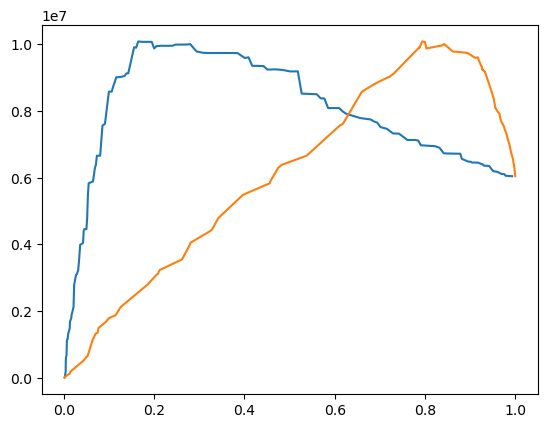

In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(argcumsort['PD'], argcumsort['ProfitCum'])
plt.plot(argcumsort['AR'], argcumsort['ProfitCum'])

In [59]:
argcumsort2=argcumsort.copy()
argcumsort2=argcumsort2.sort_values(by='ProfitCum',ascending=False)
argcumsort2=argcumsort2.reset_index()
print(argcumsort2['ProfitCum'][0])
argcumsort2.head()

10080319.758707266


,index,PD,Profit,NCum,AR,ProfitCum
0,55,0.164561,1.008032e+07,17721,0.793774,1.008032e+07
1,57,0.189245,1.006908e+07,17843,0.799239,1.006908e+07
2,56,0.174110,1.006887e+07,17842,0.799194,1.006887e+07
3,58,0.194509,1.006876e+07,17853,0.799686,1.006876e+07
4,66,0.279755,1.000115e+07,18813,0.842688,1.000115e+07


In [60]:
# Scoring code

vars_sc=list(pd.unique(Scorecard[variable_name]))

vars_num=Scorecard[Scorecard[type_name]=='INT'].copy()
vars_sc_num=list(pd.unique(vars_num[variable_name]))

vars_nom=Scorecard[Scorecard[type_name]=='NOM'].copy()
vars_sc_nom=list(pd.unique(vars_nom[variable_name]))

with open('scoring_code.sas','w') as f:
    f.write('proc sql; \n')
    f.write('create table  &zbior._score as \n')
    f.write('select indataset.*  \n')
    for var in vars_sc_num:
        scv=Scorecard[Scorecard[variable_name]==var].copy()
        scv=scv.reset_index()
        f.write(', case \n')
        for i in range(scv.shape[0]):
            war=scv[condition_name][i]
            score=scv[score_name][i]
            if war.count('<')==2:
                f.write('when '+war.rsplit('<',1)[0]+' and '+war.rsplit('<=',1)[1]+' then '+str(score)+' \n')
            if war.count('<')==1 and war.count('<>')==0:
                f.write('when '+war+' then '+str(score)+' \n')
            if war.count('= '+symbol_missing)==1:
                f.write('when '+war.split(' ')[0]+' is null then '+str(score)+' \n')
            if war.count('<> '+symbol_missing)==1:
                f.write('when '+war.split(' ')[0]+' is not null then '+str(score)+' \n')
        score=scv[score_name][0]
        f.write('else '+str(score)+' end as PSC_'+var+' \n')
        f.write(' \n')
        
    for var in vars_sc_nom:
        scv=Scorecard[Scorecard[variable_name]==var].copy()
        scv=scv.reset_index()
        f.write(', case \n')
        index_other=0;
        for i in range(scv.shape[0]):
            war=scv[condition_name][i]
            score=scv[score_name][i]
            if war.count(',')==0 and war.count(symbol_other)==0:
                f.write('when '+var+' in ('+"'"+war+"'"+') then '+str(score)+' \n')
            if war.count(',')>0 and war.count(symbol_other)==0:
                f.write('when '+var+' in ('+"'"+war.split(', ')[0]+"'")
                for j in range(war.count(',')):
                    f.write(', '+"'"+war.split(', ')[j+1]+"'")
                f.write(') then '+str(score)+' \n')
            if war.count(symbol_other)==1:
                index_other=i
        score=scv[score_name][index_other]
        f.write('else '+str(score)+' end as PSC_'+var+' \n')
        f.write(' \n')
    
    f.write('/* , 1/(1+exp(-('+str(model_cal.params[0])+'*(0.0')
    for var in vars_sc:            
        f.write('+ calculated PSC_'+var)
    f.write(')+('+str(model_cal.params[1])+')))) as '+prob_event+' */ \n')
    f.write(' \n')
    
    f.write(', 0.0 \n')
    for var in vars_sc:            
        f.write('+ calculated PSC_'+var+' ')
    f.write(' as SCORECARD_POINTS \n')
    
    f.write(' \n')
    f.write('from &zbior as indataset; \n')
    f.write('quit; \n')

In [61]:
# Variable clustering
from varclushi import VarClusHi

In [62]:
# demo1_df.drop('quality',axis=1,inplace=True)
demo1_vc = VarClusHi(logit_train[vars_selected],maxeigval2=0.1,maxclus=None)
demo1_vc.varclus()

In [63]:
writer = pd.ExcelWriter('Variable_Clustering.xlsx', engine='xlsxwriter')

demo1_vc.info.to_excel(writer, sheet_name='Info', index_label=None, index=False)
demo1_vc.rsquare.to_excel(writer, sheet_name='Clusters', index_label=None, index=False)

writer.save()
writer.close()

In [64]:
# XAI Explainable artificial intelligence

features=list(result['Efects'][variable_name].copy())
features.remove('Intercept')

# X=logit_train[features]
# y=logit_train[target_name]

X=scored_train[features]
y=scored_train[target_name]

import shap
logmodel = LogisticRegression()
logmodel.fit(X,y)

for i,v in enumerate(features):
#     logmodel.coef_[0][i]=result['Efects']['Estimation'][i]
    logmodel.coef_[0][i]=1.0
    

logmodel.intercept_=0.0

explainer=shap.LinearExplainer(logmodel,X)
shap_values=explainer(X)



In [65]:
 print(logmodel.coef_,logmodel.intercept_)

[[1. 1. 1. 1. 1.]] 0.0


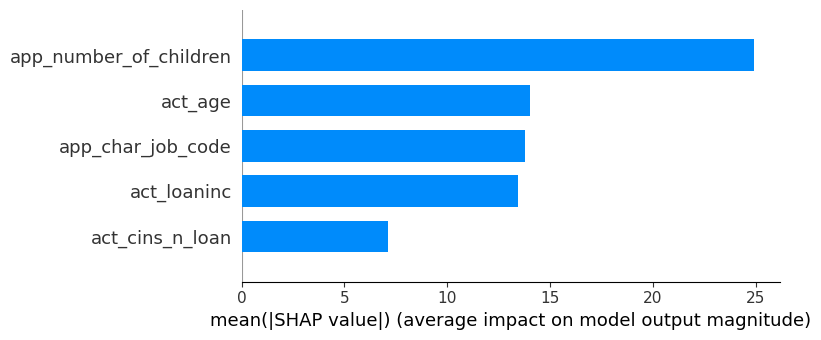

In [66]:
shap.summary_plot(shap_values,X,plot_type='bar')

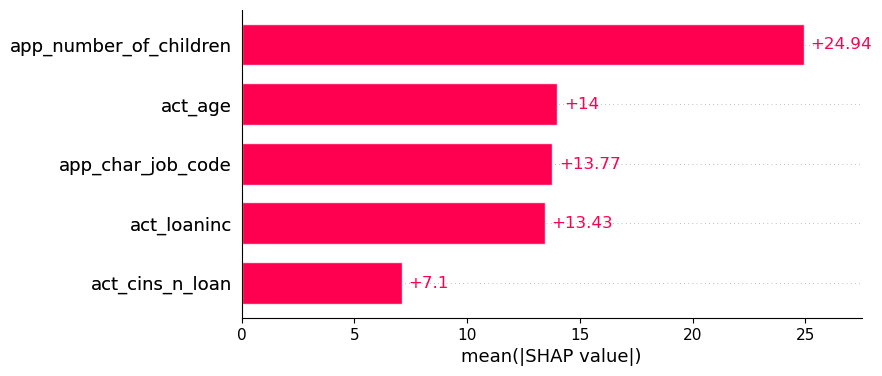

In [67]:
shap.plots.bar(shap_values)

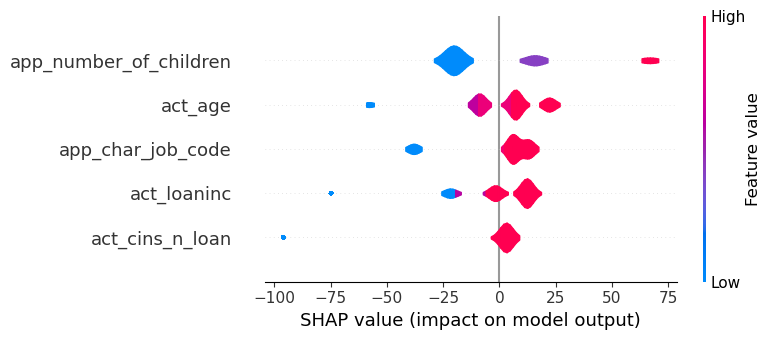

In [68]:
shap.summary_plot(shap_values,X,plot_type='violin')

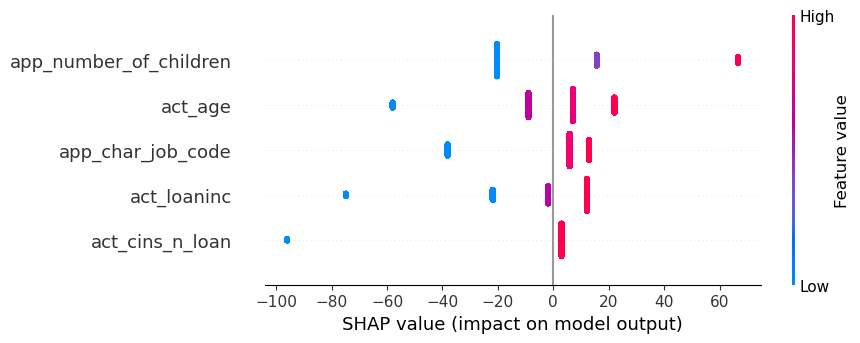

In [69]:
shap.plots.beeswarm(shap_values)

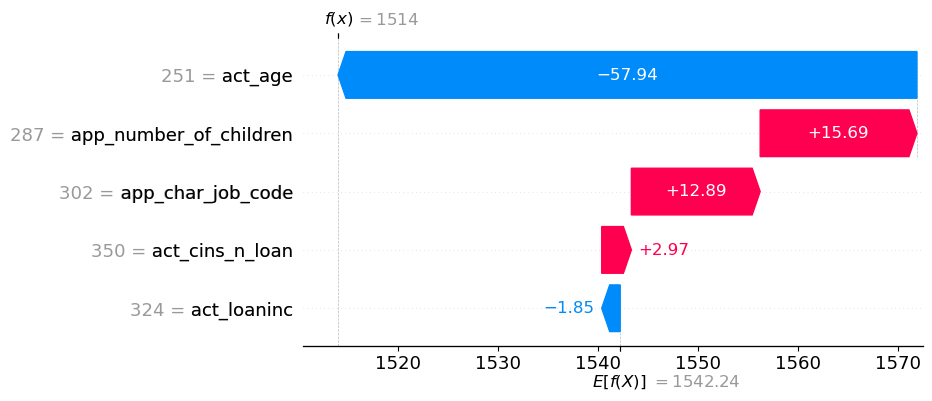

In [70]:
shap.waterfall_plot(shap_values[0])

In [71]:
shap.initjs()
shap.plots.force(shap_values[0])

In [72]:
suma=0
for v in features:
    print(v, X[v][0])
    suma=suma+X[v][0]
print('Score',suma)

act_loaninc 324.0
app_char_job_code 302.0
app_number_of_children 287.0
act_cins_n_loan 350.0
act_age 251.0
Score 1514.0


In [73]:
shap_values[0]

.values =
array([ -1.85,  12.89,  15.69,   2.97, -57.94])

.base_values =
1542.2399999999998

.data =
array([324., 302., 287., 350., 251.])

In [74]:
for v in features:
    a=X[v][0]-X[v].mean()
    print(v, a)

act_loaninc -1.0447302745248521
app_char_job_code 12.51532603826712
app_number_of_children 17.425801497408315
act_cins_n_loan 4.390286043386425
act_age -58.58091764254175


In [75]:
XS=X.copy()
XS['sum']=0.0
for v in features:
   XS['sum']=XS['sum']+X[v]

XS['sum'].mean()

1539.2942343380048

In [76]:
XShap=pd.DataFrame(shap_values.values)
XShap['sum']=0.0
for i,v in enumerate(features):
    XShap['sum']=XShap['sum']+XShap[i]
    
XShap['sum'].mean()

-2.945765661995567

In [77]:
a=shap_values.base_values.mean()+XShap['sum'].mean()
a

1539.2942343380037